# Introdução ao Supervised Machine Learning - Modelos Logísticos

Modelos logísticos, ou regressão logística, são usados para modelar a relação entre uma variável dependente binária (ou categórica) e uma ou mais variáveis independentes. Eles são amplamente aplicados quando o objetivo é prever probabilidades ou classificar dados em categorias, como em problemas de "sim" ou "não".

## Características principais
- **Variável dependente binária**: O resultado é geralmente 0 ou 1 (por exemplo, sucesso/falha).
- **Função logística (sigmóide)**: Transforma uma combinação linear das variáveis independentes em uma probabilidade entre 0 e 1.
- **Interpretação de coeficientes**: Os coeficientes podem ser interpretados em termos de odds ratios, que indicam o efeito de uma variável independente na probabilidade do resultado.

## Aplicações
- Classificação de clientes em uma campanha de marketing.
- Diagnóstico médico (doença ou não).
- Detecção de fraudes em transações financeiras. 

A fórmula geral do modelo logístico é:

\begin{equation}
P(y) = \dfrac{1}{1 + e^{-(\alpha + \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n)}}
\end{equation}

Aqui, $P(y)$ é a probabilidade do evento $y$ acontecer, e $\beta$ são os coeficientes estimados para cada variável $x$. O expoente do número de euler pode ser representado por $Z$, também chamado de *Logito*:

\begin{equation}
P(y) = \dfrac{1}{1 + e^{-Z}}
\end{equation}

**Importante:** se $P(y)$ é a probabilidade do evento $y$ acontecer, então $\overline{P(y)} = 1 - P(y)$ é a probabilidade do evento não ocorrer:

\begin{equation}
1-P(y) = 1 - \dfrac{1}{1 + e^{-Z}} = \dfrac{1}{1 + e^{Z}}
\end{equation}

Na tabela abaixo seguem alguns modelos de regressão:


\begin{array}{|c|c|c|}
\hline
\textbf{Tipo de Modelo de Regressão} & \textbf{Características da Variável Dependente} & \textbf{Distribuição} \\
\hline
\text{Regressão Linear} & \text{Quantitativa, contínua e não restrita} & \text{Normal} \\
\hline
\text{Regressão Logística Binária} & \text{Qualitativa, binária (0 ou 1)} & \text{Bernoulli} \\
\hline
\text{Regressão Logística Multinomial} & \text{Qualitativa, multicategórica} & \text{Multinomial} \\
\hline
\text{Regressão Poisson} & \text{Quantitativa, contagem (inteiros não negativos)} & \text{Poisson} \\
\hline
\text{Regressão Log-Linear} & \text{Quantitativa, contagem de eventos em categorias} & \text{Poisson} \\
\hline
\text{Regressão Gamma} & \text{Quantitativa, contínua, positiva e assimétrica} & \text{Gamma} \\
\hline
\text{Regressão Binomial Negativa} & \text{Quantitativa, contagem com sobredispersão} & \text{Binomial Negativa} \\
\hline
\text{Regressão com Transformação de Box-Cox} & \text{Quantitativa, contínua transformada} & \text{Normal (após transformação)} \\
\hline
\end{array}

**Nota**: As característica da variável dependente, refere-se à variável dependente na base de dados, não é o output do modelo. Por exemplo, na Regressão Logística Binária a variável dependente na base de dados é binária, mas o output do modelo é uma probabilidade do evento binário acontecer.

A vantagem de utilizar o logito, é que como ele representa uma probabilidade, ela deve estar limitada entre os intervalos $0$ e $1$.

Text(0.5, 0, 'z')

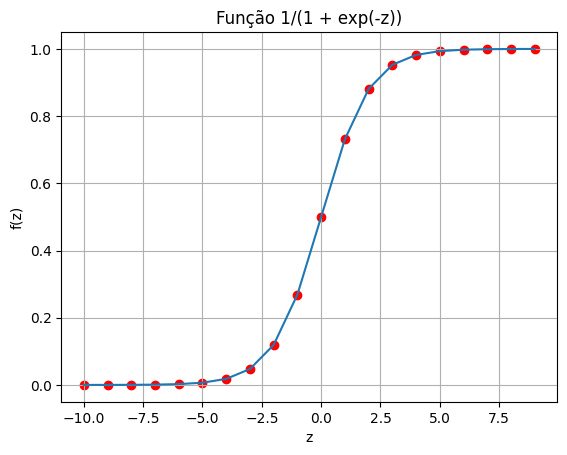

In [166]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 1)
y = 1/(1 + np.exp(-x))

plt.plot(x,y)
plt.grid(True)
plt.scatter(x,y, color='r')
plt.title('Função 1/(1 + exp(-z))')
plt.ylabel('f(z)')
plt.xlabel('z')

## Logística Binária x Multinomial

É um modelo de regressão onde a variável dependente é qualitativa, ou seja, é como se fosse uma variável *Dummy*. No caso da logística binária, haverão apenas duas categorias (*e.g.*, ter ou não ter crédito, ser aprovado ou não, sintomático ou assintomático). Caso a variável dependente tenha mais de uma categoria, então devemos utilizar a Regressão Logística Multinomial.

## Aplicação no Python - Instalação e importação dos pacotes

In [167]:
# In[0.2]: Importação dos pacotes

import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from scipy.interpolate import UnivariateSpline # curva sigmoide suavizada
import statsmodels.api as sm # estimação de modelos
import statsmodels.formula.api as smf # estimação do modelo logístico binário
from statstests.process import stepwise # procedimento Stepwise
from scipy import stats # estatística chi2
import plotly.graph_objects as go # gráficos 3D
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from statsmodels.discrete.discrete_model import MNLogit # estimação do modelo
                                                        #logístico multinomial
import warnings
warnings.filterwarnings('ignore')


# Regressão Logística Binária

Técnica supervisionada de machine learning utilizada para explicar ou predizer a probabilidade de ocorrência de um determinado evento em função de uma ou mais variáveis explicativas.

* Variável dependente: Binária
* Variáveis preditoras $X_i$: Métricas ou não métricas

Por padrão a variável dependente assume o valor $1$ caso o evento seja detectado, e $0$ caso não seja detectado.

## Conceitos de probabilidade

### O que é probabilidade?

- *Probabilidade*: Seja $p$ a probabilidade dum evento $A$ ocorrer, então $1-p$ é a probabilidade do evento não ocorrer $\overline{A}$
- *Chance (odds)*: É definida como $\dfrac{p}{1-p}$

**Exemplo**:

Caso a probabilidade de um evento $X$ ocorrer seja de $60\%$, então:

$P(X) = 60\% = \dfrac{3}{5}$ \
$\text{Odds} = \dfrac{0,6}{1-0,6} = \dfrac{0,6}{0,4} = 1,5$ 

### Likelihood (Verossimilhança) na Distribuição de Bernoulli

O **likelihood** (ou função de verossimilhança) é uma função que mede a "verossimilhança" de observarmos um determinado conjunto de dados dado um conjunto de parâmetros. No contexto da **distribuição de Bernoulli**, o parâmetro mais importante é a probabilidade de sucesso $ p $.

### Contexto da Distribuição de Bernoulli

Na distribuição de Bernoulli, temos um experimento binário que pode resultar em dois valores:
- **1** (sucesso) com probabilidade $ p $,
- **0** (fracasso) com probabilidade $ 1 - p $.

Se realizarmos **vários experimentos independentes** de Bernoulli, o objetivo do **likelihood** é calcular a probabilidade de observarmos uma sequência específica de sucessos e fracassos para um determinado valor de \( p \).

### Função de Verossimilhança

Se tivermos um conjunto de observações independentes $ X_1, X_2, \dots, X_n $ seguindo uma distribuição de Bernoulli com parâmetro $ p $, a **função de verossimilhança** é dada pelo produto das probabilidades associadas a cada observação.

#### Probabilidade de uma única observação:

Para uma observação $ X_i $ de uma variável aleatória com distribuição de Bernoulli:
\begin{equation}
P(X_i = x_i | p) = p^{x_i} (1 - p)^{1 - x_i}
\end{equation}
onde $ x_i $ é 0 ou 1.

#### Função de Verossimilhança para \( n \) observações:

Para um conjunto de observações independentes $( X_1, X_2, \dots, X_n )$, a função de verossimilhança é o **produto das probabilidades** de cada uma dessas observações:

\begin{equation}
L(p | x_1, x_2, \dots, x_n) = \prod_{i=1}^{n} p^{x_i} (1 - p)^{1 - x_i}
\end{equation}

onde $( L(p | x_1, x_2, \dots, x_n) )$ é a função de verossimilhança e \( p \) é o parâmetro que estamos tentando estimar.

### Log-Verossimilhança (Log-Likelihood)

Como a função de verossimilhança envolve um produto de muitos termos, ao lidar com grandes conjuntos de dados, é mais conveniente trabalhar com o **logaritmo** da função de verossimilhança, que transforma o produto em uma soma. Isso facilita a manipulação matemática, especialmente para maximização da verossimilhança.

A **log-verossimilhança** é dada por:

\begin{equation}
log L(p | x_1, x_2, \dots, x_n) = \sum_{i=1}^{n} \left[ x_i \log(p) + (1 - x_i) \log(1 - p) \right]
\end{equation}

Essa função é maximizada para estimar o valor de \( p \) que melhor se ajusta aos dados.

Conclusão

A **função de verossimilhança** para a distribuição de Bernoulli é a probabilidade conjunta de observar uma sequência de sucessos e fracassos em uma série de experimentos independentes, dada uma probabilidade de sucesso \( p \). Ela é representada como um produto das probabilidades associadas a cada observação. O **logaritmo da verossimilhança** é comumente usado para simplificar os cálculos, transformando o produto em uma soma, facilitando a estimativa de \( p \) via **máxima verossimilhança**.

## Função Logística

Definida para que se estabeleça a probabilidade para a ocorrência de determinado evento, e quais variáveis explicativas a influenciam. A estimação dos parâmetros vem de um processo iterativo para maximizar o acerto da probabilidade da ocorrência de um evento à sua real ocorrência. Os variáveis atribuíveis à variável dependente estarão entre 0 e 1.

In [168]:
# In[PARTE CONCEITUAL]:
#############################################################################
#                             CURVA SIGMOIDE                                #
#############################################################################

# Estabelecendo uma função para a probabilidade de ocorrência de um evento

from math import exp

# Estabelecendo uma função para a probabilidade de ocorrência de um evento
def prob(z):
    return 1 / (1 + exp(-z))

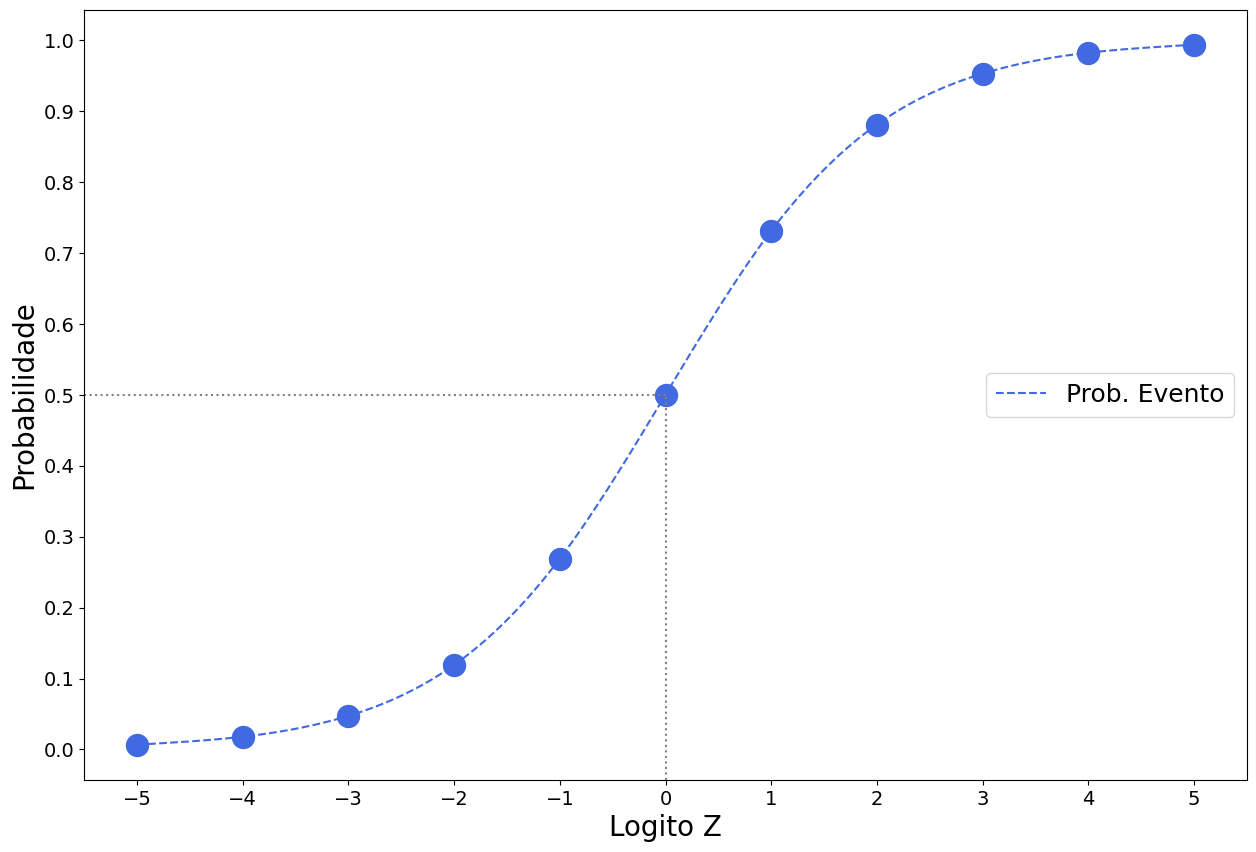

In [169]:
# In[SIGMOIDE]: Plotando a curva sigmoide teórica de ocorrência de um evento
#para um range do logito z entre -5 e +5

logitos = []
probs = []

for i in np.arange(-5, 6):
    logitos.append(i)
    probs.append(prob(i))
    
df = pd.DataFrame({'logito': logitos, 'probs': probs})

# Interpolação spline (smooth probability line)
spline = UnivariateSpline(df['logito'], df['probs'], s=0)

logitos_smooth = np.linspace(df['logito'].min(), df['logito'].max(), 500)
probs_smooth = spline(logitos_smooth)

plt.figure(figsize=(15,10))
plt.plot(logitos_smooth, probs_smooth, color='royalblue',
         linestyle='--', label='Prob. Evento')
plt.scatter(df['logito'], df['probs'], color='royalblue', marker='o', s=250)
plt.axhline(y = df.probs.mean(), color = 'grey', linestyle = ':', xmax = .5)
plt.axvline(x = 0, color = 'grey', linestyle=':', ymax = 0.5)
plt.xlabel("Logito Z", fontsize=20)
plt.ylabel("Probabilidade", fontsize=20)
plt.xticks(np.arange(-5, 6), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.legend(fontsize=18, loc='center right')
plt.show()

Como podemos observar, essa sigmóide tem como limites de y os valores 0 e 1, pois o eixo das ordenadas representa os valores de probabilidade.

## Carregando a base de dados - `atrasado.csv`

Banco de dados fictício que mostra os alunos que chegaram atrasados, em função da distância e quantidade de semáforos.

A ideia é criar um modelo tal:

\begin{equation}
P_{\text{atrasado = sim}} = \dfrac{1}{1 + e^{-(\alpha + \beta_1.\text{dist} + \beta_2.\text{sem})}}
\end{equation}

In [170]:
df_atrasado = pd.read_csv('atrasado.csv',delimiter=',')
df_atrasado[0:5]

,estudante,atrasado,dist,sem
0,Gabriela,0,12.5,7
1,Patricia,0,13.3,10
2,Gustavo,0,13.4,8
3,Leticia,0,23.5,7
4,Luiz Ovidio,0,9.5,8


In [171]:
# Características das variáveis do dataset
df_atrasado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    int64  
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [172]:
# Estatísticas univariadas
df_atrasado.describe()

,atrasado,dist,sem
count,100.000000,100.000000,100.000000
mean,0.590000,14.073000,10.210000
std,0.494311,4.330112,1.578229
min,0.000000,1.000000,5.000000
25%,0.000000,12.000000,10.000000
50%,1.000000,13.350000,10.000000
75%,1.000000,16.125000,10.000000
max,1.000000,29.000000,18.000000


In [173]:
df_atrasado['atrasado'].value_counts()

atrasado
1    59
0    41
Name: count, dtype: int64

A categoria que vai marcar o evento é chegar atrasado.

### Estimação do modelo logístico binário

Ao contrário do que faziamos em Regressão Simples e Múltipla onde estimávamos o modelo por OLS (Mínimos Quadrados), aqui iremos estimá-lo pela Máxima Verosimilhança

In [174]:
# In[1.2]: Estimação de um modelo logístico binário pela função 'smf.glm'
#('statsmodels.formula.api')

modelo_atrasos = smf.glm(formula='atrasado ~ dist + sem', data=df_atrasado,
                         family=sm.families.Binomial()).fit()

# Parâmetros do 'modelo_atrasos'
modelo_atrasos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50.466
Date:                Sun, 15 Sep 2024   Deviance:                       100.93
Time:                        17:48:35   Pearson chi2:                     86.7
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2913
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.1665      8.442     -3.100      0.002     -42.712      -9.621
dist           0.1904      0.076      2.493      0.013       0.041       0.340
sem            2.3629      0.795      2.972      0.003       0.804       3.921
==============================================================================
"""

A probabilidade de chegar atrasado é dada por:

\begin{equation}
P(y) = \dfrac{1}{1 + e^{-(\alpha + \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n)}} \Rightarrow P_\text{atrasado} = \dfrac{1}{1 + e^{-(-26,1665 + 0,1904.\text{dist} + 2,2629.\text{sem})}}
\end{equation}


#### Comentários sobre a estimação do modelo

Importante, para os modelos GLM utilizamos a estatística $z$, ao contrário da estatística $t$ oara os valores de $\beta$ nos modelos de regressão simples e múltipla.

- *LL-Null*: Estatísitca que é calculada com um "modelo nulo", ou seja 'atrasado ~ 1', com isso não há betas. Se o modelo tiver um Log-Likelihood (LL) maior que o LL nulo, então pelo menos um $\beta$ é diferente de zero.

- $\chi^2 = -2(LL_0 - LL_m)$ 


- $\text{Pseudo }R^2 = \dfrac{LL_0 - LL_m}{LL_0}$ : Quanto maior, melhor.

- $AIC = -2LL_m + 2.(k+1)$ onde $k$ é o número de $\beta$'s

- $BIC = $ Quanto menor, melhor.

In [175]:
# In[1.3]: Outputs do modelo pela função 'summary_col'

summary_col([modelo_atrasos],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.3f}".format(x.llf)
        })


,MODELO
Intercept,-26.1665***
,(8.4420)
dist,0.1904**
,(0.0764)
sem,2.3629***
,(0.7951)
N,100
Log-lik,-50.466


### Fazendo predições

In [176]:
# In[1.4]: Fazendo predições para o 'modelo_atrasos'.
#Exemplo: qual a probabilidade média de se chegar atrasado quando o
#trajeto tem 7 km e passa-se por 10 semáforos no percurso?

modelo_atrasos.predict(pd.DataFrame({'dist':[7], 'sem':[10]}))

0    0.230566
dtype: float64

In [177]:
# In[1.5]: Construção de uma matriz de confusão

# Adicionando os valores previstos de probabilidade na base de dados
df_atrasado['phat'] = modelo_atrasos.predict()

# Visualização da base de dados com a variável 'phat'
df_atrasado

,estudante,atrasado,dist,sem,phat
0,Gabriela,0,12.5,7,0.000712
1,Patricia,0,13.3,10,0.498561
2,Gustavo,0,13.4,8,0.008903
3,Leticia,0,23.5,7,0.005751
4,Luiz Ovidio,0,9.5,8,0.004257
...,...,...,...,...,...
95,Sheila,1,24.0,10,0.884040
96,Pedro,1,10.0,10,0.346606
97,Horacio,1,9.4,10,0.321210
98,Leandro,1,14.2,10,0.541301


### Construção da Matriz de Confusão

<function matplotlib.pyplot.show(close=None, block=None)>

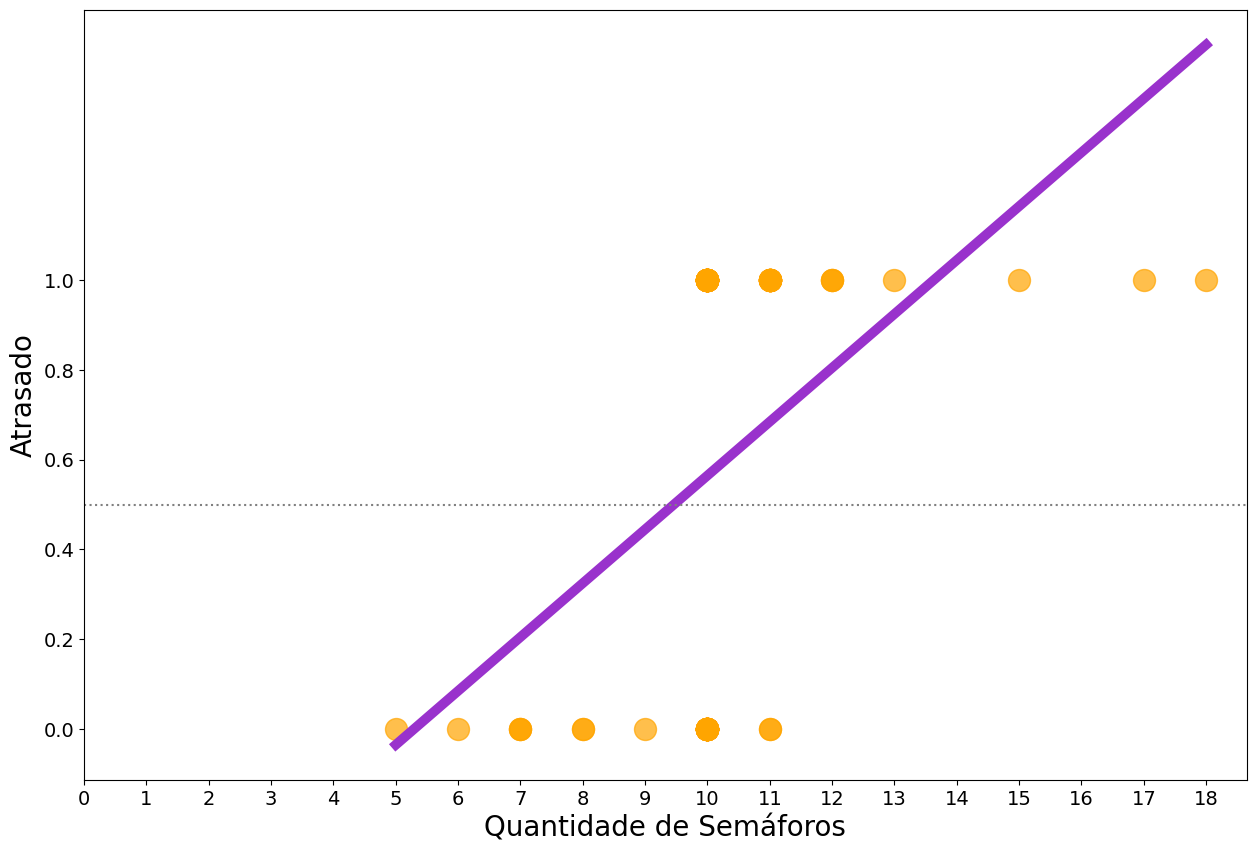

In [178]:
# In[1.6]: Gráficos com ajustes entre a variável dependente e a variável 'sem'
    
# Ajuste linear entre a variável dependente e a variável 'sem' (Gráfico errado:
#apenas para fins didáticos)

plt.figure(figsize=(15,10))
sns.regplot(x=df_atrasado['sem'], y=df_atrasado['atrasado'],
            ci=None, marker='o',
            scatter_kws={'color':'orange', 's':250, 'alpha':0.7},
            line_kws={'color':'darkorchid', 'linewidth':7})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Quantidade de Semáforos', fontsize=20)
plt.ylabel('Atrasado', fontsize=20)
plt.xticks(np.arange(0, df_atrasado['sem'].max() + 0.01),
           fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

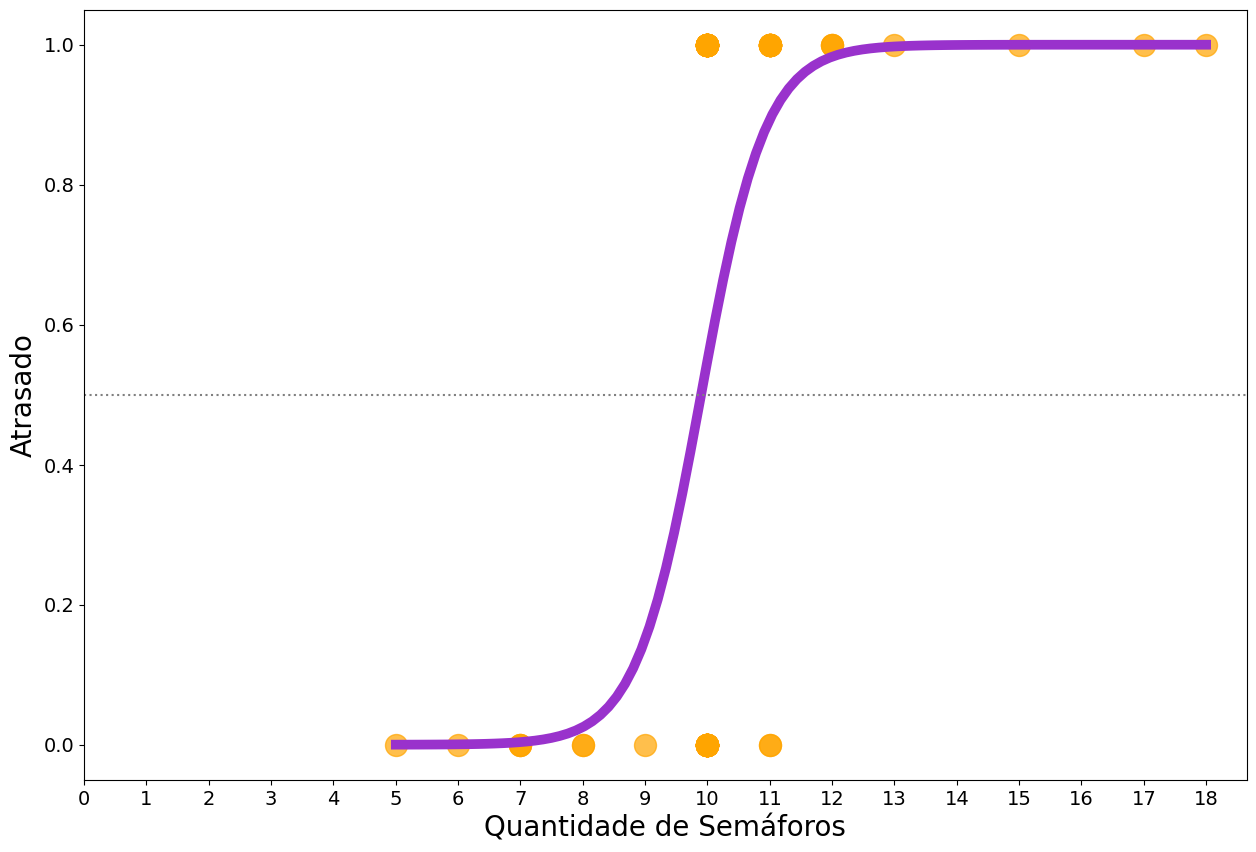

In [179]:
# In[1.7]: Ajuste logístico determinístico entre a variável dependente e a
#variável 'sem'

# Sigmoide

plt.figure(figsize=(15,10))
sns.regplot(x=df_atrasado['sem'], y=df_atrasado['atrasado'],
            ci=None, marker='o', logistic=True,
            scatter_kws={'color':'orange', 's':250, 'alpha':0.7},
            line_kws={'color':'darkorchid', 'linewidth':7})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Quantidade de Semáforos', fontsize=20)
plt.ylabel('Atrasado', fontsize=20)
plt.xticks(np.arange(0, df_atrasado['sem'].max() + 0.01),
           fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

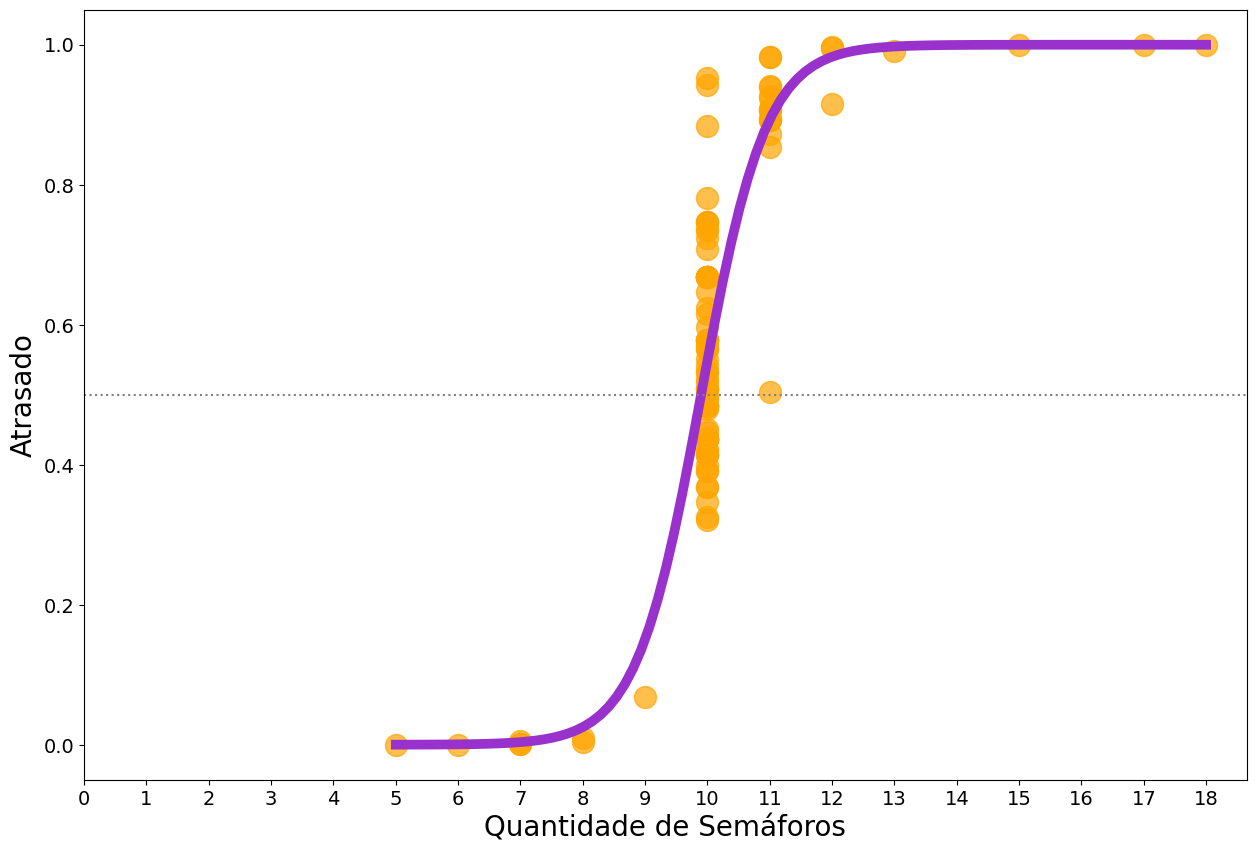

In [180]:
# In[1.8]: Ajuste logístico probabilístico entre a variável dependente e a
#variável 'sem'

# Sigmoide

plt.figure(figsize=(15,10))
sns.regplot(x=df_atrasado['sem'], y=df_atrasado['phat'],
            ci=None, marker='o', logistic=True,
            scatter_kws={'color':'orange', 's':250, 'alpha':0.7},
            line_kws={'color':'darkorchid', 'linewidth':7})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Quantidade de Semáforos', fontsize=20)
plt.ylabel('Atrasado', fontsize=20)
plt.xticks(np.arange(0, df_atrasado['sem'].max() + 0.01),
           fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show

Se:
- $\hat{P} \geq \text{cutoff} \rightarrow$ ocorreu o evento
- $\hat{P} < \text{cutoff} \rightarrow$ não ocorreu o evento

Curiosidade: O *cutoff* é mais uma medida gerencial do que de analytics. Por exemplo, ao construir um modelo para inadimplência, o *cutoff* é uma medida que implica na oferta ou não oferta de crédito para uma pessoa, e caso a emrpesa queira mitigar riscos, ela deve elevar essa métrica.

In [181]:
# In[1.9]: Construção de função para a definição da matriz de confusão

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
        
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
           
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    # Visualização dos principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

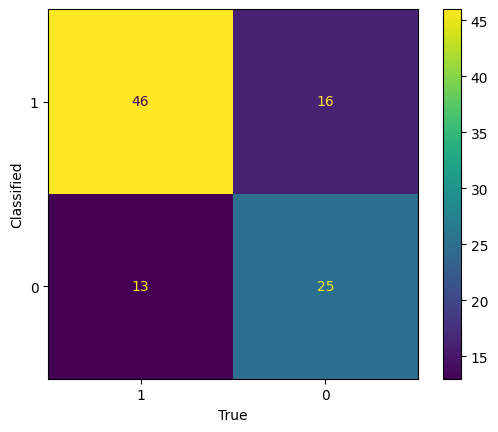

,Sensitividade,Especificidade,Acurácia
0,0.779661,0.609756,0.71


In [182]:
# Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df_atrasado['atrasado'],
                predicts=df_atrasado['phat'], 
                cutoff=0.5)

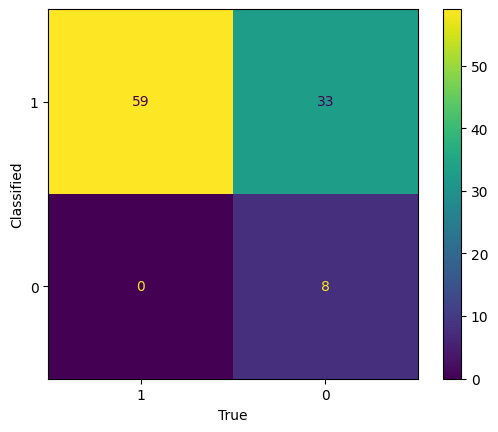

,Sensitividade,Especificidade,Acurácia
0,1.0,0.195122,0.67


In [183]:
# Matriz de confusão para cutoff = 0.3
matriz_confusao(observado=df_atrasado['atrasado'],
                predicts=df_atrasado['phat'], 
                cutoff=0.3)

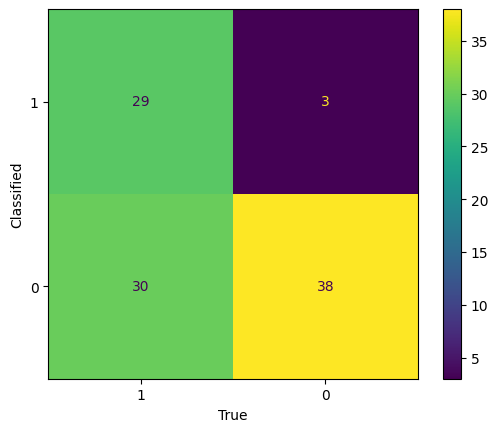

,Sensitividade,Especificidade,Acurácia
0,0.491525,0.926829,0.67


In [184]:
# Matriz de confusão para cutoff = 0.7
matriz_confusao(observado=df_atrasado['atrasado'],
                predicts=df_atrasado['phat'], 
                cutoff=0.7)

#### Análise da matriz de confusão

Sobre a matriz de confusão, temos algumas métricas:

- *Sensitividade (Recall)* - É a taxa de acerto de quem foi evento. Por exemplo, se de 59 pessoas que foram eventos, acertamos 46, então $\text{Recall} = \dfrac{46}{56} = 82,14\%$. É a taxa do **Verdadeiro Positivo**, ou $TP$.
    * $\text{Sensitividade} = \dfrac{\text{nº acertos eventos}}{\text{nº eventos}} = \dfrac{TP}{TP+FN}$


- *Especificidade*, que é a taxa de acerto de quem não foi evento. É a taxa do **Verdadeiro Negativo**, ou $TN$.
    * $\text{Especificidade} = \dfrac{\text{nº acertos não eventos}}{\text{nº  de não eventos}} = \dfrac{TN}{FP+TN}$

- *Acurácia global do modelo* = quantidade total de acertos sobre a quantidade total de pessoas.
    * $\text{Acurácia global} = \dfrac{\text{nº acertos}}{\text{nº de eventos}} = \dfrac{TP + TN}{TP+ TN + FP +FN}$

- $\text{Precision} = \dfrac{TP}{TP+FP}$

- $F1_\text{score} = \dfrac{ 2.\text{Recall } . \text{Precision} } { \text{Recall} + \text{Precision} }$

In [185]:
# In[1.11]: Igualando critérios de especificidade e de sensitividade

# Tentaremos estabelecer um critério que iguale a probabilidade de
#acerto daqueles que chegarão atrasados (sensitividade) e a probabilidade de
#acerto daqueles que não chegarão atrasados (especificidade).

# ATENÇÃO: o que será feito a seguir possui fins didáticos, apenas. DE NENHUMA
#FORMA, o procedimento garante a maximização da acurácia do modelo!

# Criação da função 'espec_sens' para a construção de um dataset com diferentes
#valores de cutoff, sensitividade e especificidade:

def espec_sens(observado,predicts):
    
    # Adicionar objeto com os valores dos predicts
    values = predicts.values
    
    # Range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

# In[1.12]: Até o momento, foram extraídos 3 vetores: 'sensitividade',
#'especificidade' e 'cutoffs'. Assim, criamos um dataframe que contém
#os vetores mencionados (dataframe 'dados_plotagem')

dados_plotagem = espec_sens(observado = df_atrasado['atrasado'],
                            predicts = df_atrasado['phat'])
dados_plotagem


,cutoffs,sensitividade,especificidade
0,0.00,1.000000,0.000000
1,0.01,1.000000,0.170732
2,0.02,1.000000,0.170732
3,0.03,1.000000,0.170732
4,0.04,1.000000,0.170732
...,...,...,...
96,0.96,0.135593,1.000000
97,0.97,0.135593,1.000000
98,0.98,0.135593,1.000000
99,0.99,0.101695,1.000000


In [186]:


tmp = dados_plotagem
tmp['diff'] = abs(dados_plotagem['sensitividade'] - dados_plotagem['especificidade'])
tmp

,cutoffs,sensitividade,especificidade,diff
0,0.00,1.000000,0.000000,1.000000
1,0.01,1.000000,0.170732,0.829268
2,0.02,1.000000,0.170732,0.829268
3,0.03,1.000000,0.170732,0.829268
4,0.04,1.000000,0.170732,0.829268
...,...,...,...,...
96,0.96,0.135593,1.000000,0.864407
97,0.97,0.135593,1.000000,0.864407
98,0.98,0.135593,1.000000,0.864407
99,0.99,0.101695,1.000000,0.898305


In [187]:
tmp_cutoff = float(tmp[tmp['diff'] == min(tmp['diff'])]['cutoffs'])

## Análise do *cutoff*

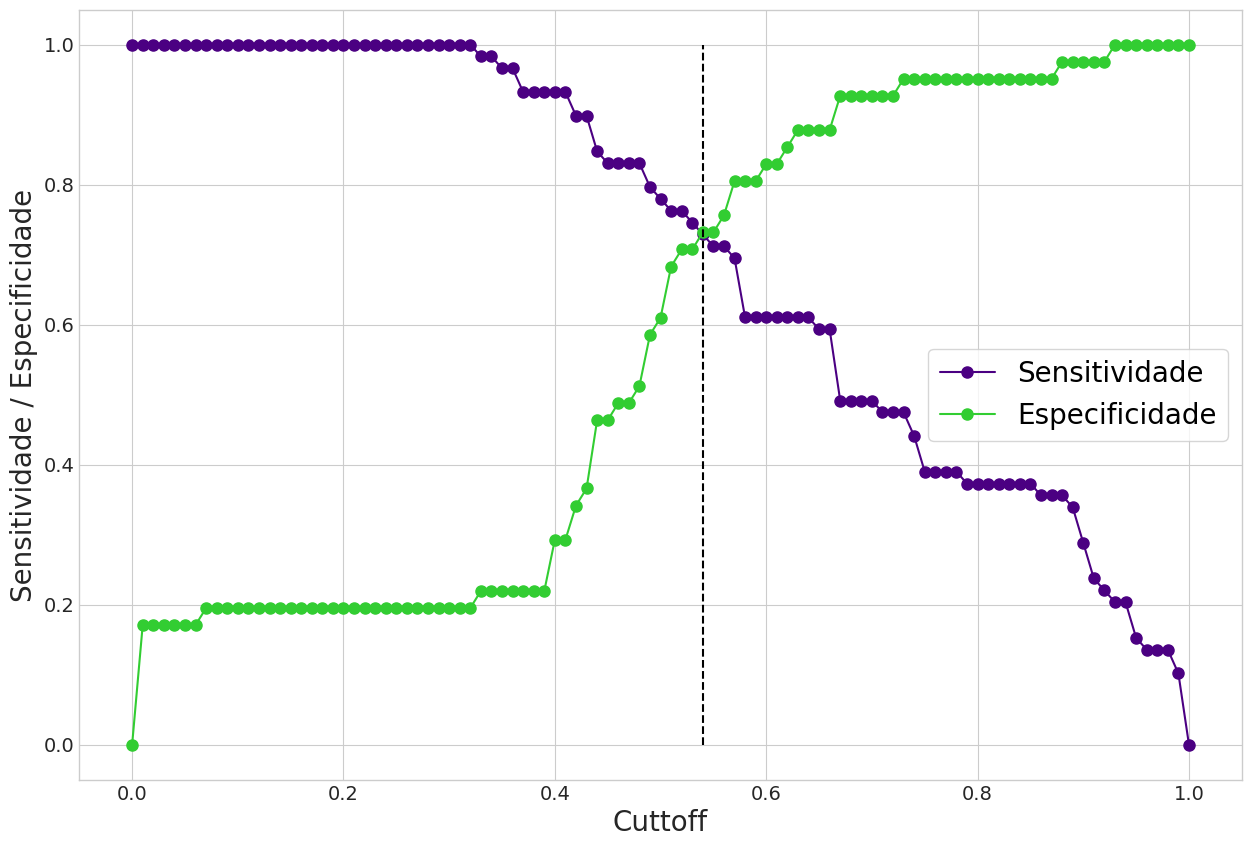

In [188]:
# In[1.13]: Plotagem de um gráfico que mostra a variação da especificidade e da
#sensitividade em função do cutoff

plt.figure(figsize=(15,10))
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, marker='o',
         color='indigo', markersize=8)
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, marker='o',
         color='limegreen', markersize=8)
plt.xlabel('Cuttoff', fontsize=20)
plt.ylabel('Sensitividade / Especificidade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.legend(['Sensitividade', 'Especificidade'], fontsize=20)
plt.plot([tmp_cutoff, tmp_cutoff], [0, 1], '--', color='k')
plt.show()

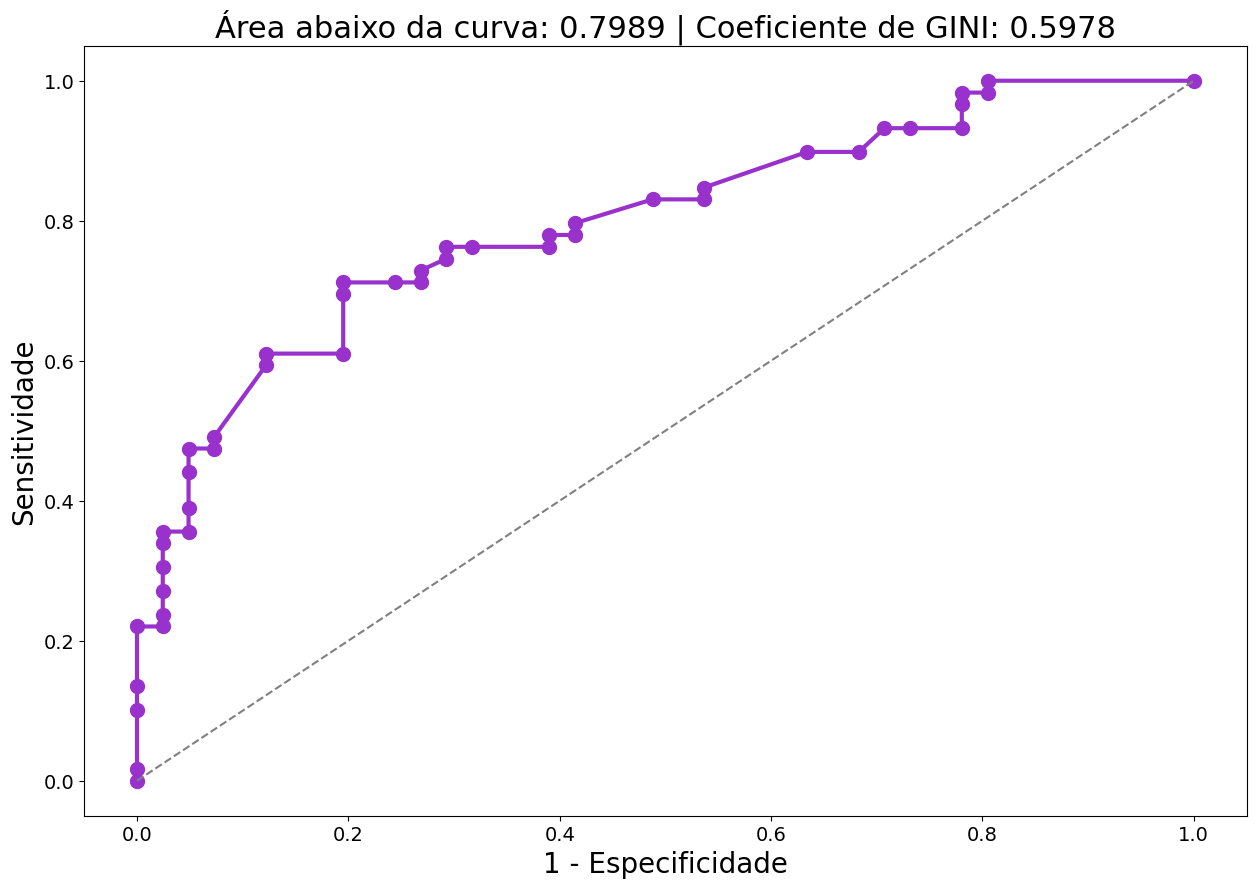

In [189]:
# In[1.14]: Construção da curva ROC

from sklearn.metrics import roc_curve, auc

# Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(df_atrasado['atrasado'], df_atrasado['phat'])
roc_auc = auc(fpr, tpr)

# Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotando a curva ROC
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=10, linewidth=3)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=22)
plt.xlabel('1 - Especificidade', fontsize=20)
plt.ylabel('Sensitividade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()

## Contrução da curva ROC

A **ROC** (Receiver Operating Characteristic) é uma curva usada para avaliar a performance de classificadores binários. Ela ilustra a relação entre a **taxa de verdadeiros positivos** (True Positive Rate ou Sensibilidade) e a **taxa de falsos positivos** (False Positive Rate) para diferentes valores de limiar de classificação.

Componentes principais da ROC:
- **Eixo Y (Sensibilidade ou TPR - True Positive Rate)**: Mede a proporção de positivos corretamente identificados.
- **Eixo X (FPR - False Positive Rate)**: Mede a proporção de negativos incorretamente classificados como positivos.

Curva ROC:
- Quanto mais a curva ROC se aproxima do canto superior esquerdo, melhor o desempenho do modelo, indicando alta taxa de verdadeiros positivos e baixa taxa de falsos positivos.
  
AUC (Área Sob a Curva):
- O **AUC (Area Under the Curve)** é uma métrica associada à ROC que quantifica o desempenho geral do classificador. Um AUC de 1 indica um modelo perfeito, enquanto um AUC de 0.5 indica um modelo aleatório.

A ROC é amplamente utilizada para comparar modelos de classificação, especialmente quando as classes estão desbalanceadas.

**Nota**: $1-Especificidade = \dfrac{FP}{FP+TN} = fpr$  que é a taxa de falsos positivos.

$GINI = \dfrac{ROC - 0,5}{0,5}$

## Resumo e conlusão

Se:
- $\hat{P} \geq \text{cutoff} \rightarrow$ ocorreu o evento
- $\hat{P} < \text{cutoff} \rightarrow$ não ocorreu o evento

A escolha do cutoff não é output do modelo, ele é um input. Vale lembrar que nem sempre o ponto em que a sensitividade = especificidade é o ponto em que melhora a acurácia.

---
Curiosidade: O *cutoff* é mais uma medida gerencial do que de analytics. Por exemplo, ao construir um modelo para inadimplência, o *cutoff* é uma medida que implica na oferta ou não oferta de crédito para uma pessoa, e caso a emrpesa queira mitigar riscos, ela deve elevar essa métrica.

- *Sensitividade (Recall)* - É a taxa de acerto de quem foi evento. Por exemplo, se de 59 pessoas que foram eventos, acertamos 46, então $\text{Recall} = \dfrac{46}{56} = 82,14\%$. É a taxa do **Verdadeiro Positivo**, ou $TP$.
    * $\text{Sensitividade} = \dfrac{\text{nº acertos eventos}}{\text{nº eventos}} = \dfrac{TP}{TP+FN}$


- *Especificidade*, que é a taxa de acerto de quem não foi evento. É a taxa do **Verdadeiro Negativo**, ou $TN$.
    * $\text{Especificidade} = \dfrac{\text{nº acertos não eventos}}{\text{nº  de não eventos}} = \dfrac{TN}{FP+TN}$

- *Acurácia global do modelo* = quantidade total de acertos sobre a quantidade total de pessoas.
    * $\text{Acurácia global} = \dfrac{\text{nº acertos}}{\text{nº de eventos}} = \dfrac{TP + TN}{TP+ TN + FP +FN}$

- $\text{Precision} = \dfrac{TP}{TP+FP}$

- $F1_\text{score} = \dfrac{ 2.\text{Recall } . \text{Precision} } { \text{Recall} + \text{Precision} }$


---
Curva ROC:
- Quanto mais a curva ROC se aproxima do canto superior esquerdo, melhor o desempenho do modelo, indicando alta taxa de verdadeiros positivos e baixa taxa de falsos positivos.
  
AUC (Área Sob a Curva):
- O **AUC (Area Under the Curve)** é uma métrica associada à ROC que quantifica o desempenho geral do classificador. Um AUC de 1 indica um modelo perfeito, enquanto um AUC de 0.5 indica um modelo aleatório.

A ROC é amplamente utilizada para comparar modelos de classificação, especialmente quando as classes estão desbalanceadas.

---

Indicadores que independem do *cutoff*:

- *LogLik* ($LL_M \rightarrow LLf$)
- $\chi^2$ ($p\text{-value} \chi^2 \rightarrow $ análogo ao $p\text{-value} F$)
    * $\chi^2 = -2(LL_0 - LL_m)$
- $AIC = -2.LLm + 2(k+1)$
- $BIC = -2LLm + (k+1).l_n(n)$

Onde $k$ é a quantidade de valores de $\beta$

# Regressão Logística Binária e Procedimento Stepwise

## Carregando a base de dados

Base de dados relativo a nave espacial Challanger, que explodiu após 73 segundos do lançamento.

Contexto do Lançamento
O ônibus espacial Challenger era parte do programa de ônibus espaciais da NASA, projetado para ser reutilizável, realizando missões de transporte de carga, satélites e astronautas ao espaço. No dia do lançamento, fazia muito frio no Centro Espacial Kennedy, na Flórida. A temperatura estava abaixo de zero, algo incomum para a região e para os lançamentos espaciais.

Condições Ambientais e o O-Ring
O fator climático desempenhou um papel crucial no fracasso. Um dos principais componentes afetados pelas baixas temperaturas foi um conjunto de anéis de vedação chamados O-rings, localizados nos boosters de combustível sólido. Esses anéis tinham a função de vedar as juntas dos propulsores, impedindo o vazamento de gases quentes. No entanto, devido às baixas temperaturas na manhã do lançamento, os O-rings ficaram rígidos e não conseguiram vedar corretamente.

Análise de Dados e Decisões Técnicas
Dados de voos anteriores já haviam mostrado problemas com os O-rings, incluindo danos menores nas juntas de vedação em lançamentos anteriores, mas a gravidade potencial desse problema foi subestimada. Os engenheiros da empresa Morton Thiokol, responsável pela fabricação dos boosters, alertaram sobre os riscos de lançamento em baixas temperaturas, mas esses avisos foram ignorados.

A análise de dados de testes e lançamentos anteriores indicava uma correlação entre baixas temperaturas e o desempenho dos O-rings. No entanto, devido à pressão para manter o cronograma da NASA e cumprir compromissos políticos e midiáticos, a decisão de prosseguir com o lançamento foi mantida.

---
**Variáveis do banco de dados**:

**desgaste**: quantidade de vezes em que ocorreu stress térmico\
**temperatura**: temperatura de lançamento (graus ºF)\
**pressão**: pressão de verificação de vazamento (psi: libra-força por polegada ao quadrado)\
**t**: teste para o lançamento (id)

In [190]:
# In[EXEMPLO 2]:
#############################################################################
#           REGRESSÃO LOGÍSTICA BINÁRIA E PROCEDIMENTO STEPWISE             #        
#                EXEMPLO 2 - CARREGAMENTO DA BASE DE DADOS                  #
#############################################################################

df_challenger = pd.read_csv('challenger.csv',delimiter=',')
df_challenger[0:5]

,desgaste,temperatura,pressão,t
0,0,66,50,1
1,1,70,50,2
2,0,69,50,3
3,0,68,50,4
4,0,67,50,5


In [191]:
# Características das variáveis do dataset
df_challenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   desgaste     23 non-null     int64
 1   temperatura  23 non-null     int64
 2   pressão      23 non-null     int64
 3   t            23 non-null     int64
dtypes: int64(4)
memory usage: 868.0 bytes


In [192]:
# Estatísticas univariadas
df_challenger.describe()

# desgaste: quantidade de vezes em que ocorreu stress térmico
# temperatura: temperatura de lançamento (graus ºF)
# pressão: pressão de verificação de vazamento (psi: libra-força por
    #polegada ao quadrado)
# t: teste para o lançamento (id)

,desgaste,temperatura,pressão,t
count,23.000000,23.000000,23.000000,23.00000
mean,0.304348,69.565217,152.173913,12.00000
std,0.558796,7.057080,68.221332,6.78233
min,0.000000,53.000000,50.000000,1.00000
25%,0.000000,67.000000,75.000000,6.50000
50%,0.000000,70.000000,200.000000,12.00000
75%,0.500000,75.000000,200.000000,17.50000
max,2.000000,81.000000,200.000000,23.00000


In [193]:
def celsius(far):
    celsius = 5*((far - 32)/9)
    print(celsius)

celsius(32)

0.0


## Criação da variável dependente Falha

In [194]:
# In[2.1]: Criação da variável dependente binária 'falha'

# Não há uma variável binária para servir como uma variável dependente, certo?
# Então vamos criá-la, considerando a ocorrência de desgastes de peças como a
#ocorrência de um evento que chamaremos de 'falha':

df_challenger.loc[df_challenger['desgaste'] != 0 , 'falha'] = 1
df_challenger.loc[df_challenger['desgaste'] == 0, 'falha'] = 0

# Transformando a variável 'falha' para o tipo 'int' (poderia também deixar
#como 'float'), a fim de que seja possível estimar o modelo por meio da
#função 'sm.Logit.from_formula'

df_challenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   desgaste     23 non-null     int64  
 1   temperatura  23 non-null     int64  
 2   pressão      23 non-null     int64  
 3   t            23 non-null     int64  
 4   falha        23 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.0 KB


In [195]:
df_challenger['falha'] = df_challenger['falha'].astype('int64')

In [196]:
df_challenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   desgaste     23 non-null     int64
 1   temperatura  23 non-null     int64
 2   pressão      23 non-null     int64
 3   t            23 non-null     int64
 4   falha        23 non-null     int64
dtypes: int64(5)
memory usage: 1.0 KB


In [197]:
df_challenger[0:5]

,desgaste,temperatura,pressão,t,falha
0,0,66,50,1,0
1,1,70,50,2,1
2,0,69,50,3,0
3,0,68,50,4,0
4,0,67,50,5,0


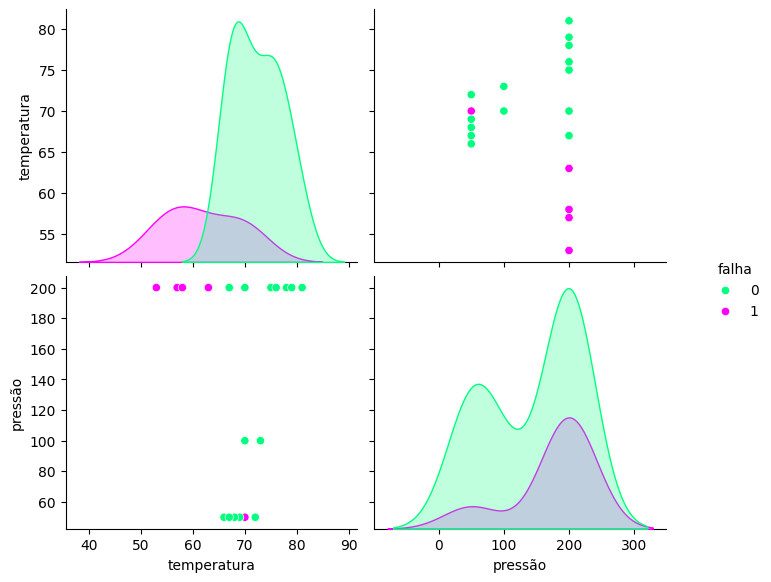

In [198]:
# In[2.2]: Gráfico 'pairplot' com scatters e KDEs por 'falha'

cores_desejadas = {0: 'springgreen', 1: 'magenta'}

g = sns.pairplot(df_challenger[['falha','temperatura','pressão']], hue='falha',
                 palette=cores_desejadas)
g.fig.set_size_inches(8, 6)
plt.show()

## Estimação do modelo logístico

In [199]:
# In[2.3]: Estimação do modelo logístico binário pela função 'sm.Logit.from_formula'
#('statsmodels.api')

# O modelo a seguir também pode ser estimado por meio da função 'smf.glm'
#('statsmodels.formula.api')

modelo_challenger = sm.Logit.from_formula('falha ~ temperatura + pressão',
                                          df_challenger).fit()

# Parâmetros do 'modelo_challenger'
modelo_challenger.summary()

Optimization terminated successfully.
         Current function value: 0.305063
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  falha   No. Observations:                   23
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            2
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.4685
Time:                        17:48:39   Log-Likelihood:                -7.0164
converged:                       True   LL-Null:                       -13.201
Covariance Type:            nonrobust   LLR p-value:                  0.002061
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      21.8436     11.936      1.830      0.067      -1.551      45.239
temperatura    -0.3501      0.173     -2.024      0.043      -0.689      -0.011
pressão         0.0060      0.010      0.616      0.538      -0.013       0.025
===============================================================================
"""

Pela análise dos valores de $\beta$ podemos ver que a variável pressão não é estatísticamente significativa.

### Procedimento stepwise

In [200]:
# In[2.4]: Procedimento Stepwise

# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.process import stepwise

# Estimação do modelo por meio do procedimento Stepwise
step_challenger = stepwise(modelo_challenger, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 falha ~ Q('temperatura') + Q('pressão')
Optimization terminated successfully.
         Current function value: 0.305063
         Iterations 8

 Discarding atribute "Q('pressão')" with p-value equal to 0.5378022290437207 

Estimating model...: 
 falha ~ Q('temperatura')
Optimization terminated successfully.
         Current function value: 0.313604
         Iterations 8

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('pressão')", 'p-value': 0.5378022290437207}

 Model after stepwise process...: 
 falha ~ Q('temperatura') 

                           Logit Regression Results                           
Dep. Variable:                  falha   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Sep 2024   Pseudo 

## Fazendo predições com o modelo

In [201]:
# In[2.5]: Fazendo predições para o modelo 'step_challenger'

# Exemplo 1: qual a probabilidade média de falha a 70ºF (~21.11ºC)?
step_challenger.predict(pd.DataFrame({'temperatura':[70]}))

0    0.130777
dtype: float64

In [202]:
# Exemplo 2: qual a probabilidade média de falha a 77ºF (25ºC)?
step_challenger.predict(pd.DataFrame({'temperatura':[77]}))

0    0.011419
dtype: float64

In [203]:
# Exemplo 3: qual a probabilidade média de falha a 34ºF (~1.11ºC)?
# Temperatura no momento do lançamento
step_challenger.predict(pd.DataFrame({'temperatura':[34]}))

0    0.999988
dtype: float64

In [204]:
# In[2.6]: Atribuindo uma coluna no dataframe para os resultados

df_challenger['phat'] = step_challenger.predict()

df_challenger

,desgaste,temperatura,pressão,t,falha,phat
0,0,66,50,1,0,0.394770
1,1,70,50,2,1,0.130777
2,0,69,50,3,0,0.178373
3,0,68,50,4,0,0.238539
4,0,67,50,5,0,0.311309
5,0,72,50,6,0,0.067389
6,0,73,100,7,0,0.047688
7,0,70,100,8,0,0.130777
8,1,57,200,9,1,0.946496
9,1,63,200,10,1,0.662129


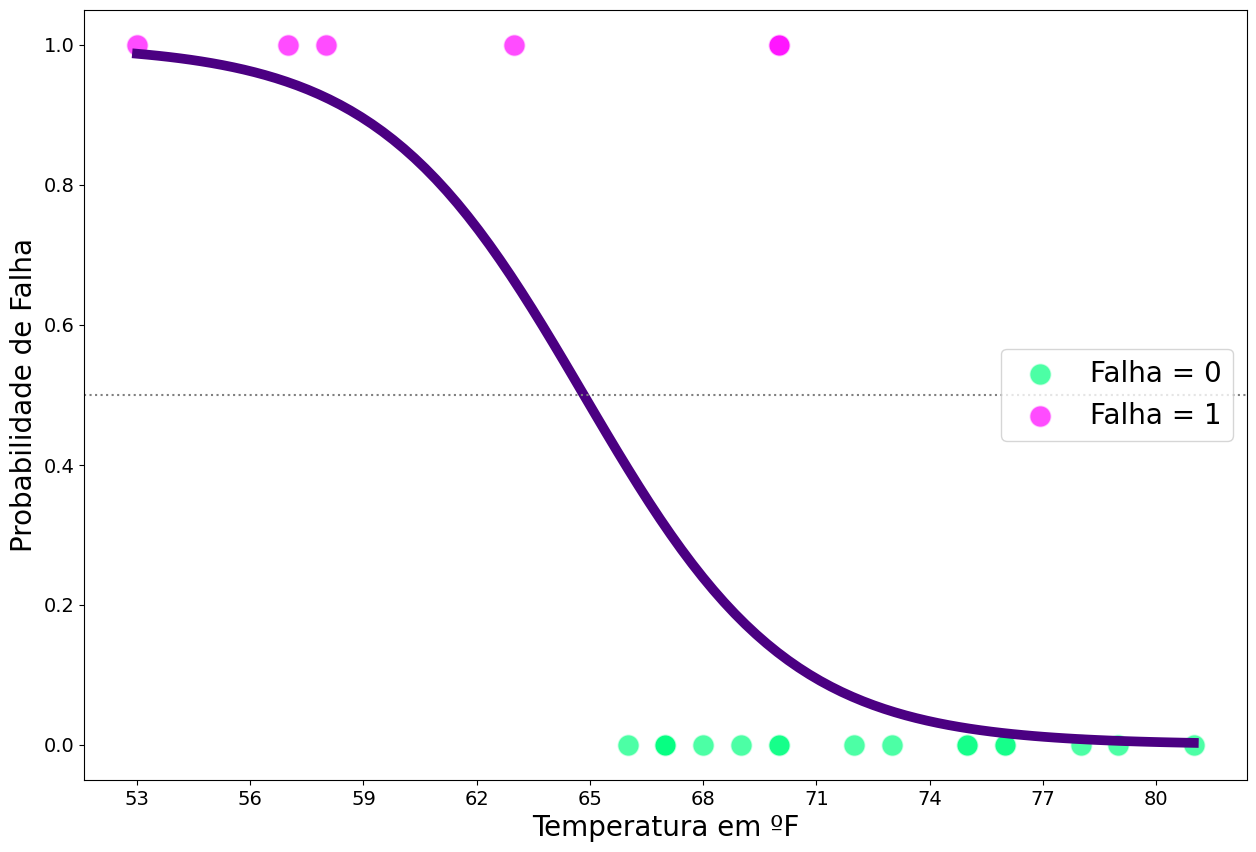

In [205]:
# In[2.7]: Construção da sigmoide
# Probabilidade de evento em função da variável 'temperatura'    

plt.figure(figsize=(15,10))
sns.scatterplot(x=df_challenger['temperatura'][df_challenger['falha'] == 0],
                y=df_challenger['falha'][df_challenger['falha'] == 0],
                color='springgreen', alpha=0.7, s=250, label='Falha = 0')
sns.scatterplot(x=df_challenger['temperatura'][df_challenger['falha'] == 1],
                y=df_challenger['falha'][df_challenger['falha'] == 1],
                color='magenta', alpha=0.7, s=250, label='Falha = 1')
sns.regplot(x=df_challenger['temperatura'], y=df_challenger['falha'],
            logistic=True, ci=None, scatter=False,
            line_kws={'color': 'indigo', 'linewidth': 7})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Temperatura em ºF', fontsize=20)
plt.ylabel('Probabilidade de Falha', fontsize=20)
plt.xticks(np.arange(df_challenger['temperatura'].min(),
                     df_challenger['temperatura'].max() + 0.01, 3),
           fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.legend(fontsize=20, loc='center right')
plt.show()

# Regressão Logística Binária com Variáveis Explicativas Quanti e Qualis

## Carregando a base de dados

Exemplo de uma rede varegista de fidelidade ao consumo. A base de dados contém as seguintes variáveis:

**id**: identificação \
**fidelidade**: se foi fiel ou não\
**sexo**\
**idade**\
**atendimento**: Grau de satisfação em relação ao atendimento\
**sortimento**: Grau de satisfação em relação à variedade de produtos oferecidos pela loja\
**acessibilidade**: Nota que dá para acessibilidade ao estabelecimento. Como rampas, estacionamento, etc.\
**preço**: Percepção em relação ao preço

Para atendimento, sortimento, acessibilidade e preço, quanto maior a avaliação melhor.

São 3000 observações de clientes.

In [206]:
# In[EXEMPLO 3]:
#############################################################################
#  REGRESSÃO LOGÍSTICA BINÁRIA COM VARIÁVEIS EXPLICATIVAS QUANTI E QUALIS   #
#                EXEMPLO 3 - CARREGAMENTO DA BASE DE DADOS                  #
#############################################################################

df_fidelidade = pd.read_csv('dados_fidelidade.csv',delimiter=',')
df_fidelidade

,id,fidelidade,sexo,idade,atendimento,sortimento,acessibilidade,preço
0,1,nao,feminino,34,2,2,1,1
1,2,nao,feminino,34,2,2,1,1
2,3,nao,masculino,34,3,2,4,2
3,4,nao,feminino,34,4,3,3,3
4,5,nao,feminino,34,4,3,1,4
...,...,...,...,...,...,...,...,...
2995,2996,sim,masculino,34,4,4,1,3
2996,2997,sim,feminino,34,4,5,4,2
2997,2998,sim,masculino,36,4,4,3,3
2998,2999,sim,feminino,35,4,4,5,4


In [207]:
# Características das variáveis do dataset
df_fidelidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3000 non-null   int64 
 1   fidelidade      3000 non-null   object
 2   sexo            3000 non-null   object
 3   idade           3000 non-null   int64 
 4   atendimento     3000 non-null   int64 
 5   sortimento      3000 non-null   int64 
 6   acessibilidade  3000 non-null   int64 
 7   preço           3000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 187.6+ KB


In [208]:
# Estatísticas univariadas
df_fidelidade.describe()

,id,idade,atendimento,sortimento,acessibilidade,preço
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,34.21000,3.490000,3.360000,3.330000,3.380000
std,866.169729,1.57058,0.964474,1.221023,1.296789,1.017814
min,1.000000,29.00000,1.000000,1.000000,1.000000,1.000000
25%,750.750000,34.00000,3.000000,2.750000,3.000000,3.000000
50%,1500.500000,34.00000,4.000000,4.000000,3.000000,3.000000
75%,2250.250000,34.00000,4.000000,4.000000,5.000000,4.000000
max,3000.000000,42.00000,5.000000,5.000000,5.000000,5.000000


In [209]:
# In[3.1]: Alteração dos tipos das variáveis não quantitativas no dataframe

# Transformação do 'id' para o tipo 'str'
df_fidelidade['id'] = df_fidelidade['id'].astype('str')

# Transformação das variáveis explicativas qualitativas para o tipo 'object'
df_fidelidade['atendimento'] = df_fidelidade['atendimento'].astype('object')
df_fidelidade['sortimento'] = df_fidelidade['sortimento'].astype('object')
df_fidelidade['acessibilidade'] = df_fidelidade['acessibilidade'].astype('object')
df_fidelidade['preço'] = df_fidelidade['preço'].astype('object')

In [210]:
# Características das variáveis do dataset
df_fidelidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3000 non-null   object
 1   fidelidade      3000 non-null   object
 2   sexo            3000 non-null   object
 3   idade           3000 non-null   int64 
 4   atendimento     3000 non-null   object
 5   sortimento      3000 non-null   object
 6   acessibilidade  3000 non-null   object
 7   preço           3000 non-null   object
dtypes: int64(1), object(7)
memory usage: 187.6+ KB


In [211]:
# Estatísticas univariadas
df_fidelidade.describe()

,idade
count,3000.00000
mean,34.21000
std,1.57058
min,29.00000
25%,34.00000
50%,34.00000
75%,34.00000
max,42.00000


## Tabela de frequências

In [212]:
# In[3.2]: Tabela de frequências absolutas das variáveis qualitativas referentes
#aos atributos da loja na percepção dos consumidores

df_fidelidade['fidelidade'].value_counts().sort_index()

fidelidade
nao    1320
sim    1680
Name: count, dtype: int64

In [213]:
df_fidelidade['sexo'].value_counts().sort_index()

sexo
feminino     2400
masculino     600
Name: count, dtype: int64

In [214]:
df_fidelidade['atendimento'].value_counts().sort_index()

atendimento
1     150
2     300
3     750
4    1530
5     270
Name: count, dtype: int64

In [215]:
df_fidelidade['sortimento'].value_counts().sort_index()

sortimento
1     330
2     420
3     570
4    1200
5     480
Name: count, dtype: int64

In [216]:
df_fidelidade['acessibilidade'].value_counts().sort_index()

acessibilidade
1     420
2      90
3    1410
4     240
5     840
Name: count, dtype: int64

In [217]:
df_fidelidade['preço'].value_counts().sort_index()

preço
1     180
2     270
3    1170
4     990
5     390
Name: count, dtype: int64

## Criando a variável binária evento e não evento

In [218]:
# In[3.3]: Note que a variável Y 'fidelidade' está definida como objeto
#(PROBLEMA!!!)

# Transformando a variável Y para 0 e 1 e para o tipo 'int' (poderia também
#ser do tipo 'float'), a fim de que seja possível estimar o modelo por meio
#da função 'sm.Logit.from_formula'

df_fidelidade.loc[df_fidelidade['fidelidade']=='sim', 'fidelidade'] = 1
df_fidelidade.loc[df_fidelidade['fidelidade']=='nao', 'fidelidade'] = 0

df_fidelidade['fidelidade'] = df_fidelidade['fidelidade'].astype('int64')

df_fidelidade

,id,fidelidade,sexo,idade,atendimento,sortimento,acessibilidade,preço
0,1,0,feminino,34,2,2,1,1
1,2,0,feminino,34,2,2,1,1
2,3,0,masculino,34,3,2,4,2
3,4,0,feminino,34,4,3,3,3
4,5,0,feminino,34,4,3,1,4
...,...,...,...,...,...,...,...,...
2995,2996,1,masculino,34,4,4,1,3
2996,2997,1,feminino,34,4,5,4,2
2997,2998,1,masculino,36,4,4,3,3
2998,2999,1,feminino,35,4,4,5,4


## Processo de dummyzação das variáveis preditoras qualitativas

In [219]:
# In[3.4]: Dummizando as variáveis 'atendimento', 'sortimento', 'acessibilidade',
#'preço' e 'sexo'. O código abaixo, automaticamente, fará:
# a) a dummização das variáveis originais;
# b) a remoção das variáveis dummizadas originais;
# c) a definição das categorias de label 1 de cada variável original como
#categorias de referência, por meio do argumento 'drop_first=True'.

df_fidelidade_dummies = pd.get_dummies(df_fidelidade,
                                       columns=['atendimento',
                                                'sortimento',
                                                'acessibilidade',
                                                'preço',
                                                'sexo'],
                                       dtype=int,
                                       drop_first=True)

df_fidelidade_dummies

,id,fidelidade,idade,atendimento_2,atendimento_3,atendimento_4,atendimento_5,sortimento_2,sortimento_3,sortimento_4,sortimento_5,acessibilidade_2,acessibilidade_3,acessibilidade_4,acessibilidade_5,preço_2,preço_3,preço_4,preço_5,sexo_masculino
0,1,0,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,34,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
3,4,0,34,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,0,34,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,1,34,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2996,2997,1,34,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2997,2998,1,36,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
2998,2999,1,35,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0


## Fazendo a predição do modelo

Queremos um modelo onde a fidelidade é a variável dependente, e sexo, atendimento, preço, sortimento são variáveis explicativas.

In [220]:
# In[3.5]: Estimação do modelo logístico binário

# Sugestão de uso neste caso, dada a existência de muitas dummies no dataframe
# Definição da fórmula utilizada no modelo

lista_colunas = list(df_fidelidade_dummies.drop(columns=['id',
                                                         'fidelidade']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "fidelidade ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

# Modelo propriamente dito
modelo_fidelidade = sm.Logit.from_formula(formula_dummies_modelo,
                                               df_fidelidade_dummies).fit()

# Parâmetros do 'modelo_fidelidade'
modelo_fidelidade.summary()

Fórmula utilizada:  fidelidade ~ idade + atendimento_2 + atendimento_3 + atendimento_4 + atendimento_5 + sortimento_2 + sortimento_3 + sortimento_4 + sortimento_5 + acessibilidade_2 + acessibilidade_3 + acessibilidade_4 + acessibilidade_5 + preço_2 + preço_3 + preço_4 + preço_5 + sexo_masculino
Optimization terminated successfully.
         Current function value: 0.257856
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fidelidade   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2981
Method:                           MLE   Df Model:                           18
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.6241
Time:                        17:48:41   Log-Likelihood:                -773.57
converged:                       True   LL-Null:                       -2057.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -68.9866      6.055    -11.394      0.000     -80.854     -57.120
idade                1.6870      0.176      9.561      0.000       1.341       2.033
atendimento_2        1.6808      0.336      5.004      0.000       1.023       2.339
atendimento_3        1.8172      0.342      5.321      0.000       1.148       2.487
atendimento_4        3.3168      0.311     10.651      0.000       2.706       3.927
atendimento_5        4.3119      0.432      9.977      0.000       3.465       5.159
sortimento_2         1.8503      0.396      4.671      0.000       1.074       2.627
sortimento_3         2.0511      0.321      6.389      0.000       1.422       2.680
sortimento_4         3.3290      0.320     10.388      0.000       2.701       3.957
sortimento_5         5.9365      0.402     14.755      0.000       5.148       6.725
acessibilidade_2     2.3475      0.446      5.258      0.000       1.473       3.223
acessibilidade_3     2.9229      0.281     10.404      0.000       2.372       3.474
acessibilidade_4     4.2907      2.123      2.021      0.043       0.130       8.451
acessibilidade_5     5.3662      0.376     14.260      0.000       4.629       6.104
preço_2              0.5706      2.122      0.269      0.788      -3.589       4.730
preço_3              2.9216      0.390      7.486      0.000       2.157       3.687
preço_4              3.0393      0.416      7.314      0.000       2.225       3.854
preço_5              3.9142      0.442      8.849      0.000       3.047       4.781
sexo_masculino       1.7695      0.197      8.962      0.000       1.383       2.157
====================================================================================
"""

## Procedimento stepwise

In [221]:
# In[3.6]: Procedimento Stepwise

# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.process import stepwise

#Estimação do modelo por meio do procedimento Stepwise
step_modelo_fidelidade = stepwise(modelo_fidelidade, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 fidelidade ~ Q('idade') + Q('atendimento_2') + Q('atendimento_3') + Q('atendimento_4') + Q('atendimento_5') + Q('sortimento_2') + Q('sortimento_3') + Q('sortimento_4') + Q('sortimento_5') + Q('acessibilidade_2') + Q('acessibilidade_3') + Q('acessibilidade_4') + Q('acessibilidade_5') + Q('preço_2') + Q('preço_3') + Q('preço_4') + Q('preço_5') + Q('sexo_masculino')
Optimization terminated successfully.
         Current function value: 0.257856
         Iterations 9

 Discarding atribute "Q('preço_2')" with p-value equal to 0.788057057780617 

Estimating model...: 
 fidelidade ~ Q('idade') + Q('atendimento_2') + Q('atendimento_3') + Q('atendimento_4') + Q('atendimento_5') + Q('sortimento_2') + Q('sortimento_3') + Q('sortimento_4') + Q('sortimento_5') + Q('acessibilidade_2') + Q('acessibilidade_3') + Q('acessibilidade_4') + Q('acessibilidade_5') + Q('preço_3') + Q('preço_4') + Q('preço_5') + Q('sexo_masculino')
Optimization terminated success

## Criação da matriz de confusão

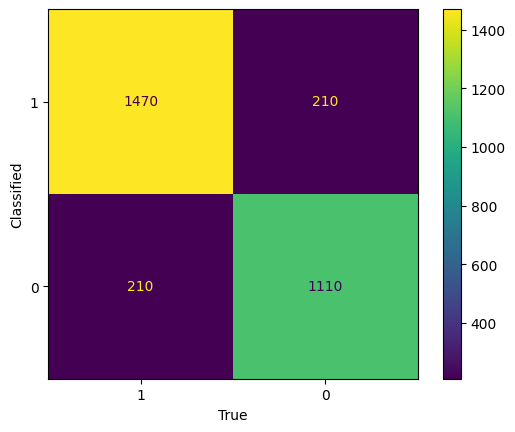

,Sensitividade,Especificidade,Acurácia
0,0.875,0.840909,0.86


In [222]:
# In[3.7]: Construção de função para a definição da matriz de confusão

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
        
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
           
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
        
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

# In[3.8]: Construção da matriz de confusão

# Adicionando os valores previstos de probabilidade na base de dados
df_fidelidade_dummies['phat'] = step_modelo_fidelidade.predict()

# Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df_fidelidade_dummies['fidelidade'],
                predicts=df_fidelidade_dummies['phat'],
                cutoff=0.50)

## Análise da especificadade e sensitividade

In [223]:
# In[3.9]: Igualando critérios de especificidade e de sensitividade

# Tentaremos estabelecer um critério que iguale a probabilidade de
#acerto daqueles que chegarão atrasados (sensitividade) e a probabilidade de
#acerto daqueles que não chegarão atrasados (especificidade).

# ATENÇÃO: o que será feito a seguir possui fins didáticos, apenas. DE NENHUMA
#FORMA o procedimento garante a maximização da acurácia do modelo!

# Criação da função 'espec_sens' para a construção de um dataset com diferentes
#valores de cutoff, sensitividade e especificidade:

def espec_sens(observado,predicts):
    
    # adicionar objeto com os valores dos predicts
    values = predicts.values
    
    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

# In[3.10]: Até o momento, foram extraídos 3 vetores: 'sensitividade',
#'especificidade' e 'cutoffs'. Assim, criamos um dataframe que contém
#os vetores mencionados

dados_plotagem = espec_sens(observado = df_fidelidade_dummies['fidelidade'],
                            predicts = df_fidelidade_dummies['phat'])
dados_plotagem

,cutoffs,sensitividade,especificidade
0,0.00,1.000000,0.000000
1,0.01,1.000000,0.295455
2,0.02,1.000000,0.318182
3,0.03,1.000000,0.340909
4,0.04,1.000000,0.386364
...,...,...,...
96,0.96,0.625000,1.000000
97,0.97,0.517857,1.000000
98,0.98,0.428571,1.000000
99,0.99,0.339286,1.000000


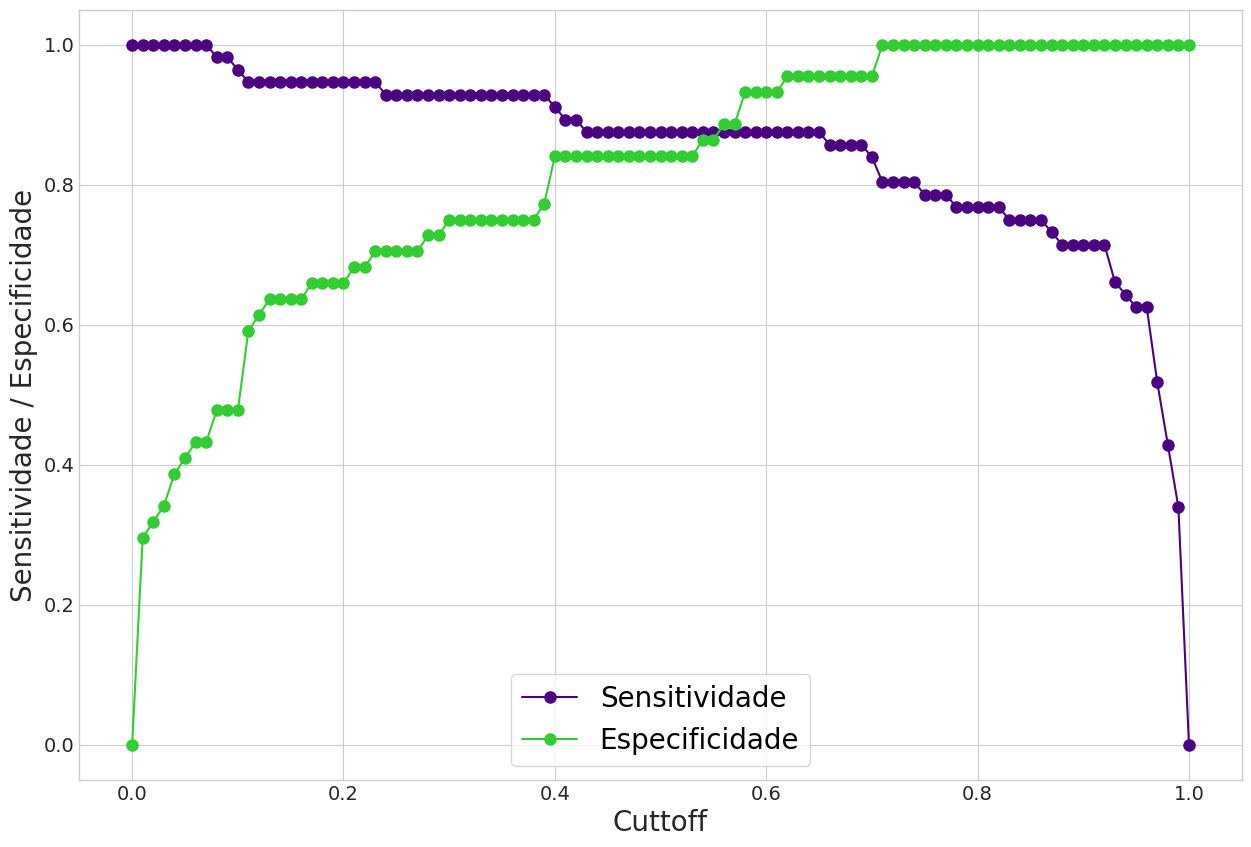

In [224]:
# In[3.11]: Plotagem de um gráfico que mostra a variação da especificidade e da
#sensitividade em função do cutoff

plt.figure(figsize=(15,10))
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, marker='o',
         color='indigo', markersize=8)
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, marker='o',
         color='limegreen', markersize=8)
plt.xlabel('Cuttoff', fontsize=20)
plt.ylabel('Sensitividade / Especificidade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.legend(['Sensitividade', 'Especificidade'], fontsize=20)
plt.show()


## Análise do ROC

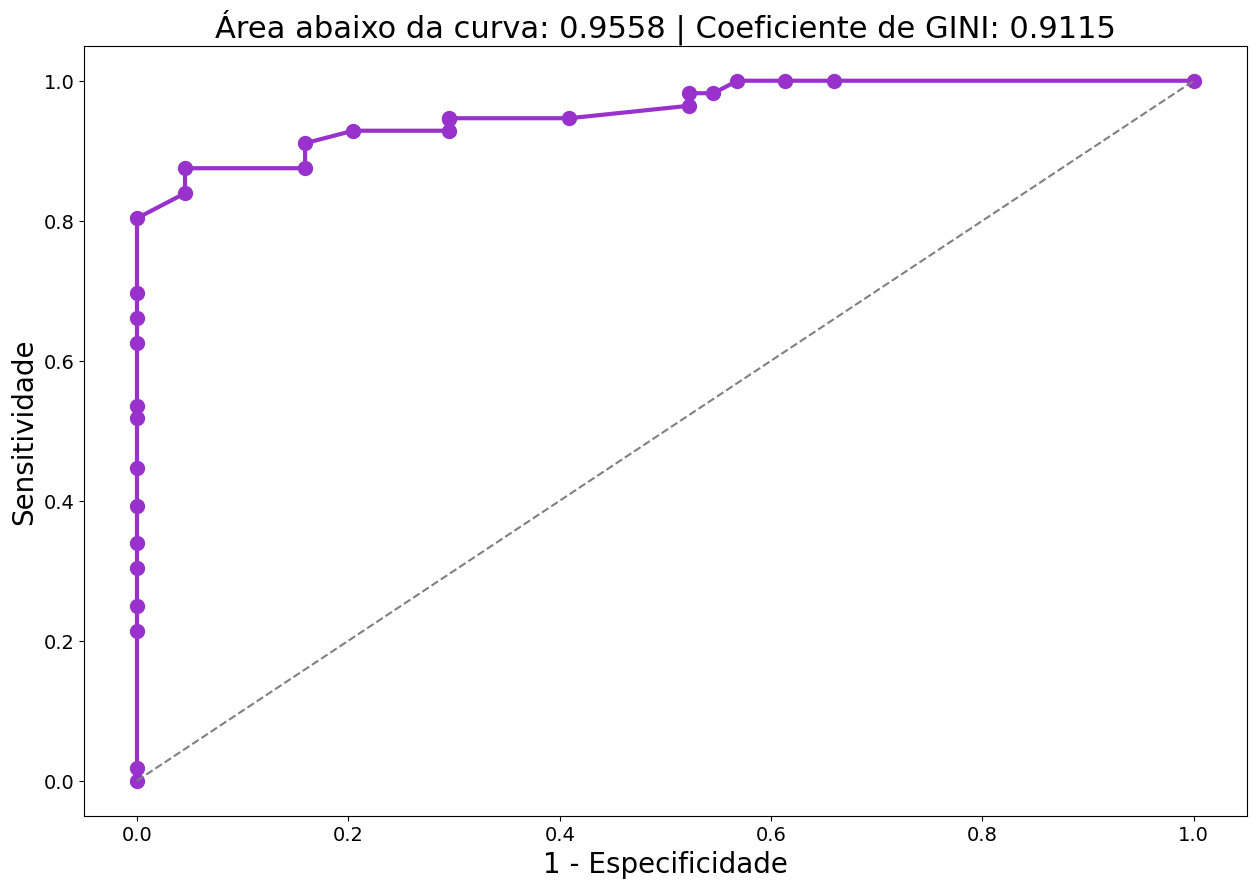

In [225]:
# In[3.12]: Construção da curva ROC

from sklearn.metrics import roc_curve, auc

# Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(df_fidelidade_dummies['fidelidade'],
                                df_fidelidade_dummies['phat'])
roc_auc = auc(fpr, tpr)

# Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotando a curva ROC
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=10, linewidth=3)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=22)
plt.xlabel('1 - Especificidade', fontsize=20)
plt.ylabel('Sensitividade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()


## Resumo e conclusão

**Curva ROC**

Um fator que pode aumentar o valor da área abaixo da curva ROC é a inserção de novas variáveis preditoras. A análise de diferentes curvas ROC pode indicar o quão agressivo ou passivo um modelo é quanto a classificação dos eventos ou não eventos ao se alterar o limiar.

---
\
**LL - Log Likelihood**

O valor loglik de um ajuste não necessariamente indica se o modelo é ruim ou não, mas ao se comparar os valores de $LL$ de dierentes modelos podemos decidir se um modelo é melhor do outro.

---


# Regressão Logística Multinomial

Nesse caso, a variável logística não é mais dicotômica, mas sim policotômica.

No modelo de regressão logística binária a probabilidade de ocorrência do evento $P_1$ era dada por $P_1 = \dfrac{e^Z}{1 + e^Z}$ então a probabilidade do não evento $P_0$ é dada por $P_0 = 1 - \dfrac{e^Z}{1 + e^Z} = \dfrac{1}{1 + e^Z}$ onde $Z$ é o logito, que por sua vez é o modelo a ser estimado ($\alpha + \beta_1.X_1 \dots \beta_k.X_k$).  Já no modelo de Regressão Logística Multinomial, deveremos ter mais de um logito, e com isso, novas funções para as probabilidades. Por exemplo, para 3 respostas possíveis, temos:

- *ref* : $P_0 = \dfrac{e^0}{e^0 + e^{Z_1} + e^{Z_2}} = \dfrac{1}{1 + e^{Z_1} + e^{Z_2}}$
  
- $H_1$: $P_1$ = $\dfrac{e^{Z_1}}{1 + e^{Z_1} + e^{Z_2}}$
  
- $H_2$: $P_2$ = $\dfrac{e^{Z_2}}{1 + e^{Z_1} + e^{Z_2}}$

Onde

$Z_1 = \alpha_1 + \beta_{11} + \beta_{12} + \dots + \beta_1k$\
$Z_2 = \alpha_2 + \beta_{12} + \beta_{22} + \dots + \beta_2k$

Isso significa, que num modelo com 4 variáveis contendo 5 categorias cada, e tendo 5 outputs possíveis, então deveremos ter 4 logitos, e para cada logito deveremos estimar 16 valores de $\beta$ (um valor de $\beta$ para cada *dummy*, lembrando que são n-1 dummies para cada variável, onde n é o número de observações.)

## Carregando a base de dados - `atrasado_multinomial.csv`

In [226]:
df_atrasado_multinomial = pd.read_csv('atrasado_multinomial.csv',delimiter=',')
df_atrasado_multinomial

,estudante,atrasado,dist,sem
0,Gabriela,chegou atrasado segunda aula,20.500000,15
1,Patricia,chegou atrasado segunda aula,21.299999,18
2,Gustavo,chegou atrasado segunda aula,21.400000,16
3,Leticia,chegou atrasado segunda aula,31.500000,15
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16
...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10
96,Pedro,chegou atrasado primeira aula,15.000000,15
97,Horacio,chegou atrasado primeira aula,14.400000,15
98,Leandro,chegou atrasado segunda aula,22.200001,18


In [227]:
# Características das variáveis do dataset
df_atrasado_multinomial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    object 
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [228]:
# Estatísticas univariadas
df_atrasado_multinomial.describe()

,dist,sem
count,100.000000,100.000000
mean,17.673000,13.810000
std,5.130299,3.329376
min,1.000000,10.000000
25%,14.950000,10.000000
50%,18.750000,15.000000
75%,21.000000,18.000000
max,31.500000,19.000000


In [235]:
# In[4.1]: Note que a variável Y 'atrasado' está definida como objeto

# Tabela de frequências absolutas da variável 'atrasado' com labels
df_atrasado_multinomial['atrasado'].value_counts().sort_index()

# Criando uma variável 'atrasado2' a partir da variável 'atrasado',
#com labels iguais a 0, 1 e 2 e com tipo 'int' (poderia também ser do tipo
#'float'), a fim de que seja possível estimar o modelo por meio
#da função 'MNLogit' do pacote 'statsmodels.discrete.discrete_model'

df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']==
                            'nao chegou atrasado',
                            'atrasado2'] = 0 #categoria de referência

df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']==
                            'chegou atrasado primeira aula',
                            'atrasado2'] = 1

df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']==
                            'chegou atrasado segunda aula',
                            'atrasado2'] = 2

In [236]:
# Definição do tipo 'int' para a variável dependente 'atrasado2'
df_atrasado_multinomial['atrasado2'] =\
    df_atrasado_multinomial['atrasado2'].astype('int64')

df_atrasado_multinomial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    object 
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
 4   atrasado2  100 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB


In [233]:
df_atrasado_multinomial

,estudante,atrasado,dist,sem,atrasado2
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2
1,Patricia,chegou atrasado segunda aula,21.299999,18,2
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2
3,Leticia,chegou atrasado segunda aula,31.500000,15,2
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2
...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0
96,Pedro,chegou atrasado primeira aula,15.000000,15,1
97,Horacio,chegou atrasado primeira aula,14.400000,15,1
98,Leandro,chegou atrasado segunda aula,22.200001,18,2


## Estimação do Modelo Logístico Multinomial

No Modelo Logístico Multinomial utilizamos a função de densidade de probabilidade binomial.

In [242]:
# In[4.2]: Estimação do modelo logístico multinomial

x = df_atrasado_multinomial.drop(columns=['estudante','atrasado','atrasado2'])
x

,dist,sem
0,20.500000,15
1,21.299999,18
2,21.400000,16
3,31.500000,15
4,17.500000,16
...,...,...
95,24.000000,10
96,15.000000,15
97,14.400000,15
98,22.200001,18


In [ ]:
y = df_atrasado_multinomial['atrasado2']

In [ ]:
# Esse pacote precisa que a constante seja definida pelo usuário
X = sm.add_constant(x)

In [247]:
X

,const,dist,sem
0,1.0,20.500000,15
1,1.0,21.299999,18
2,1.0,21.400000,16
3,1.0,31.500000,15
4,1.0,17.500000,16
...,...,...,...
95,1.0,24.000000,10
96,1.0,15.000000,15
97,1.0,14.400000,15
98,1.0,22.200001,18


In [241]:
y

0     2
1     2
2     2
3     2
4     2
     ..
95    0
96    1
97    1
98    2
99    0
Name: atrasado2, Length: 100, dtype: int64

In [ ]:
# Estimação do modelo - função 'MNLogit' ('statsmodels.discrete.discrete_model')
modelo_atrasado = MNLogit(endog=y, exog=X).fit()

# Parâmetros do modelo 'modelo_zzzatrasado'
modelo_atrasado.summary()

Optimization terminated successfully.
         Current function value: 0.245118
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              atrasado2   No. Observations:                  100
Model:                        MNLogit   Df Residuals:                       94
Method:                           MLE   Df Model:                            4
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.7574
Time:                        18:42:56   Log-Likelihood:                -24.512
converged:                       True   LL-Null:                       -101.02
Covariance Type:            nonrobust   LLR p-value:                 4.598e-32
===============================================================================
atrasado2=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -33.1352     12.183     -2.720      0.007     -57.014      -9.256
dist            0.5588      0.243      2.297      0.022       0.082       1.036
sem             1.6699      0.577      2.895      0.004       0.539       2.801
-------------------------------------------------------------------------------
atrasado2=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -62.2922     14.675     -4.245      0.000     -91.055     -33.530
dist            1.0784      0.302      3.566      0.000       0.486       1.671
sem             2.8949      0.686      4.220      0.000       1.550       4.239
===============================================================================
"""

Ou seja, temos:

- *ref* : $P_0 = \dfrac{1}{1 + e^{-33,1352 + 0,5588.\text{dist} + 1,6699.\text{sem}} + e^{--62,2922 + 1,0784.\text{dist} + 2,8949.\text{sem}}}$
  
- $H_1$: $P_1$ = $\dfrac{ e^{-33,1352 + 0,5588.\text{dist} + 1,6699.\text{sem}}}{1 + e^{-33,1352 + 0,5588.\text{dist} + 1,6699.\text{sem}} + e^{--62,2922 + 1,0784.\text{dist} + 2,8949.\text{sem}}}$
  
- $H_2$: $P_2$ = $\dfrac{e^{-62,2922 + 1,0784.\text{dist} + 2,8949.\text{sem}}}{1 + e^{-33,1352 + 0,5588.\text{dist} + 1,6699.\text{sem}} + e^{-62,2922 + 1,0784.\text{dist} + 2,8949.\text{sem}}}$


## Definindo a função $\chi^2$

In [248]:
# In[4.3]: Vamos definir uma função 'Qui2' para se extrair a estatística geral
# do modelo

def Qui2(modelo_multinomial):
    maximo = modelo_multinomial.llf
    minimo = modelo_multinomial.llnull
    qui2 = -2*(minimo - maximo)
    pvalue = stats.distributions.chi2.sf(qui2, 4) # 4 graus de liberdade
    df = pd.DataFrame({'Qui quadrado':[qui2],
                       'pvalue':[pvalue]})
    return df

In [249]:
# In[4.4]: Estatística geral do 'modelo_atrasado'

Qui2(modelo_atrasado)

,Qui quadrado,pvalue
0,153.014842,4.598249e-32


## Fazendo predições

In [251]:
# In[4.5]: Fazendo predições para o 'modelo_atrasado'

# Exemplo: qual a probabilidade média de atraso para cada categoria da
#variável dependente, se o indivíduo tiver que percorrer 22km e passar
#por 12 semáforos?

# No nosso exemplo, temos os seguintes labels para a variável 'atrasado2':
# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

resultado = modelo_atrasado.predict(pd.DataFrame({'const':[1],
                                                   'dist':[22],
                                                   'sem':[12]})).round(4)

resultado


,0,1,2
0,0.6802,0.305,0.0148


In [252]:
# Uma maneira de identificar a classe do resultado de acordo com o 'predict'
resultado.idxmax(axis=1)

0    0
dtype: int64

In [253]:
# In[4.6]: Adicionando as probabilidades de ocorrência de cada uma das
#categorias de Y definidas pela modelagem ao dataframe original, bem como a
#respectiva classificação

# Probabilidades de ocorrência das três categoriais
# Definição do array 'phats':
phats = modelo_atrasado.predict()
phats

array([[1.80102363e-02, 5.23387941e-01, 4.58601822e-01],
       [2.75130062e-06, 1.87367571e-02, 9.81260492e-01],
       [6.79619018e-04, 1.73471514e-01, 8.25848867e-01],
       [2.75947562e-07, 3.74792245e-03, 9.96251802e-01],
       [2.08378239e-02, 6.01588294e-01, 3.77573882e-01],
       [2.22165091e-06, 1.69188816e-02, 9.83078897e-01],
       [2.22165091e-06, 1.69188816e-02, 9.83078897e-01],
       [2.89390852e-07, 6.37240812e-03, 9.93627302e-01],
       [6.13907187e-07, 9.14185529e-03, 9.90857531e-01],
       [6.13907187e-07, 9.14185529e-03, 9.90857531e-01],
       [1.79364087e-06, 1.52746327e-02, 9.84723574e-01],
       [3.15016602e-05, 5.93319231e-02, 9.40636575e-01],
       [1.14468666e-08, 1.34770371e-03, 9.98652285e-01],
       [5.85478765e-02, 7.30993731e-01, 2.10458393e-01],
       [3.15016602e-05, 5.93319231e-02, 9.40636575e-01],
       [2.64359782e-02, 5.80967070e-01, 3.92596952e-01],
       [1.30075533e-06, 1.30990445e-02, 9.86899655e-01],
       [2.55399681e-05, 5.37916

In [254]:
# Transformação do array 'phats' para o dataframe 'phats':
phats = pd.DataFrame(phats)
phats

,0,1,2
0,1.801024e-02,0.523388,4.586018e-01
1,2.751301e-06,0.018737,9.812605e-01
2,6.796190e-04,0.173472,8.258489e-01
3,2.759476e-07,0.003748,9.962518e-01
4,2.083782e-02,0.601588,3.775739e-01
...,...,...,...
95,9.531361e-01,0.046317,5.471598e-04
96,4.146183e-01,0.557343,2.803830e-02
97,5.008256e-01,0.481441,1.773339e-02
98,1.049763e-06,0.011822,9.881774e-01


In [255]:
# Concatenando o dataframe original com o dataframe 'phats':
df_atrasado_multinomial = pd.concat([df_atrasado_multinomial, phats], axis=1)
df_atrasado_multinomial

,estudante,atrasado,dist,sem,atrasado2,0,1,2
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2,1.801024e-02,0.523388,4.586018e-01
1,Patricia,chegou atrasado segunda aula,21.299999,18,2,2.751301e-06,0.018737,9.812605e-01
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2,6.796190e-04,0.173472,8.258489e-01
3,Leticia,chegou atrasado segunda aula,31.500000,15,2,2.759476e-07,0.003748,9.962518e-01
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2,2.083782e-02,0.601588,3.775739e-01
...,...,...,...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0,9.531361e-01,0.046317,5.471598e-04
96,Pedro,chegou atrasado primeira aula,15.000000,15,1,4.146183e-01,0.557343,2.803830e-02
97,Horacio,chegou atrasado primeira aula,14.400000,15,1,5.008256e-01,0.481441,1.773339e-02
98,Leandro,chegou atrasado segunda aula,22.200001,18,2,1.049763e-06,0.011822,9.881774e-01


In [256]:
# Analisando o resultado de acordo com a categoria de resposta:
predicao = phats.idxmax(axis=1)
predicao

0     1
1     2
2     2
3     2
4     1
     ..
95    0
96    1
97    0
98    2
99    0
Length: 100, dtype: int64

In [257]:
# Adicionando a categoria de resposta 'predicao' ao dataframe original,
#por meio da criação da variável 'predicao'
df_atrasado_multinomial['predicao'] = predicao
df_atrasado_multinomial

,estudante,atrasado,dist,sem,atrasado2,0,1,2,predicao
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2,1.801024e-02,0.523388,4.586018e-01,1
1,Patricia,chegou atrasado segunda aula,21.299999,18,2,2.751301e-06,0.018737,9.812605e-01,2
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2,6.796190e-04,0.173472,8.258489e-01,2
3,Leticia,chegou atrasado segunda aula,31.500000,15,2,2.759476e-07,0.003748,9.962518e-01,2
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2,2.083782e-02,0.601588,3.775739e-01,1
...,...,...,...,...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0,9.531361e-01,0.046317,5.471598e-04,0
96,Pedro,chegou atrasado primeira aula,15.000000,15,1,4.146183e-01,0.557343,2.803830e-02,1
97,Horacio,chegou atrasado primeira aula,14.400000,15,1,5.008256e-01,0.481441,1.773339e-02,0
98,Leandro,chegou atrasado segunda aula,22.200001,18,2,1.049763e-06,0.011822,9.881774e-01,2


In [258]:
# Criando a variável 'predicao_label' a partir da variável 'predicao',
#respeitando os seguintes rótulos:
# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==0,
                            'predicao_label'] ='não chegou atrasado'
df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==1,
                            'predicao_label'] ='chegou atrasado primeira aula'
df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==2,
                            'predicao_label'] ='chegou atrasado segunda aula'

df_atrasado_multinomial

,estudante,atrasado,dist,sem,atrasado2,0,1,2,predicao,predicao_label
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2,1.801024e-02,0.523388,4.586018e-01,1,chegou atrasado primeira aula
1,Patricia,chegou atrasado segunda aula,21.299999,18,2,2.751301e-06,0.018737,9.812605e-01,2,chegou atrasado segunda aula
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2,6.796190e-04,0.173472,8.258489e-01,2,chegou atrasado segunda aula
3,Leticia,chegou atrasado segunda aula,31.500000,15,2,2.759476e-07,0.003748,9.962518e-01,2,chegou atrasado segunda aula
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2,2.083782e-02,0.601588,3.775739e-01,1,chegou atrasado primeira aula
...,...,...,...,...,...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0,9.531361e-01,0.046317,5.471598e-04,0,não chegou atrasado
96,Pedro,chegou atrasado primeira aula,15.000000,15,1,4.146183e-01,0.557343,2.803830e-02,1,chegou atrasado primeira aula
97,Horacio,chegou atrasado primeira aula,14.400000,15,1,5.008256e-01,0.481441,1.773339e-02,0,não chegou atrasado
98,Leandro,chegou atrasado segunda aula,22.200001,18,2,1.049763e-06,0.011822,9.881774e-01,2,chegou atrasado segunda aula


## Criando a matriz de confusão e análise da eficiência do modelo

In [259]:
# In[4.7]: Criação de tabela para cálculo da eficiência global do modelo

# Criando uma tabela para comparar as ocorrências reais com as predições
table = pd.pivot_table(df_atrasado_multinomial,
                       index=['predicao_label'],
                       columns=['atrasado'],
                       aggfunc='size')
table

atrasado,chegou atrasado primeira aula,chegou atrasado segunda aula,nao chegou atrasado
predicao_label,,,
chegou atrasado primeira aula,12.0,5.0,2.0
chegou atrasado segunda aula,3.0,30.0,NaN
não chegou atrasado,1.0,NaN,47.0


In [260]:
# Substituindo 'NaN' por zero
table = table.fillna(0)
table

atrasado,chegou atrasado primeira aula,chegou atrasado segunda aula,nao chegou atrasado
predicao_label,,,
chegou atrasado primeira aula,12.0,5.0,2.0
chegou atrasado segunda aula,3.0,30.0,0.0
não chegou atrasado,1.0,0.0,47.0


A eficiência geral do modelo é dada por $\dfrac{\text{nº de acertos}}{\text{nº de eventos}}$ 

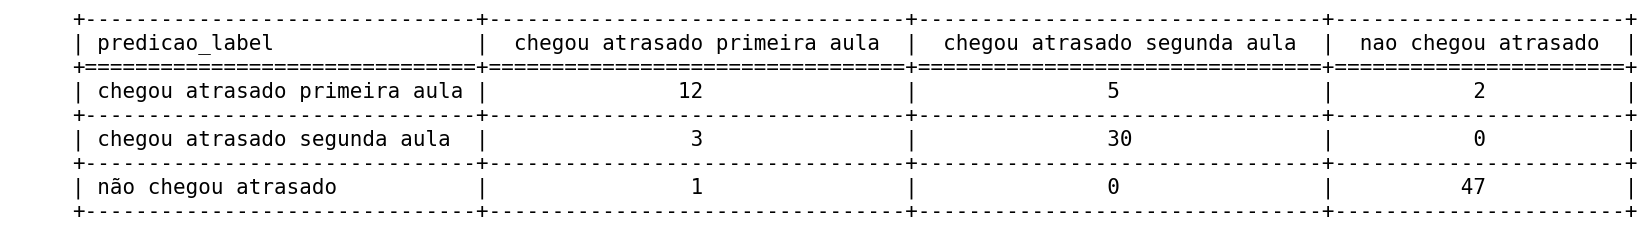

In [262]:
# In[4.8]: Visualização, para fins didáticos, do objeto 'table' (dataframe)
#no ambiente Plots

from tabulate import tabulate
tabela = tabulate(table, headers='keys', tablefmt='grid', numalign='center')

plt.figure(figsize=(8, 3))
plt.text(0.1, 0.1, tabela, {'family': 'monospace', 'size': 15})
plt.axis('off')
plt.show()

In [263]:
# In[4.9]: Eficiência global do modelo propriamente dita

# Transformando o dataframe 'table' para 'array', para que seja possível
#estabelecer o atributo 'diagonal'
table = table.to_numpy()
table

array([[12.,  5.,  2.],
       [ 3., 30.,  0.],
       [ 1.,  0., 47.]])

In [265]:
# Eficiência global do modelo
acuracia = table.diagonal().sum()/table.sum()
acuracia

0.89

## Plotagem das probabilidades

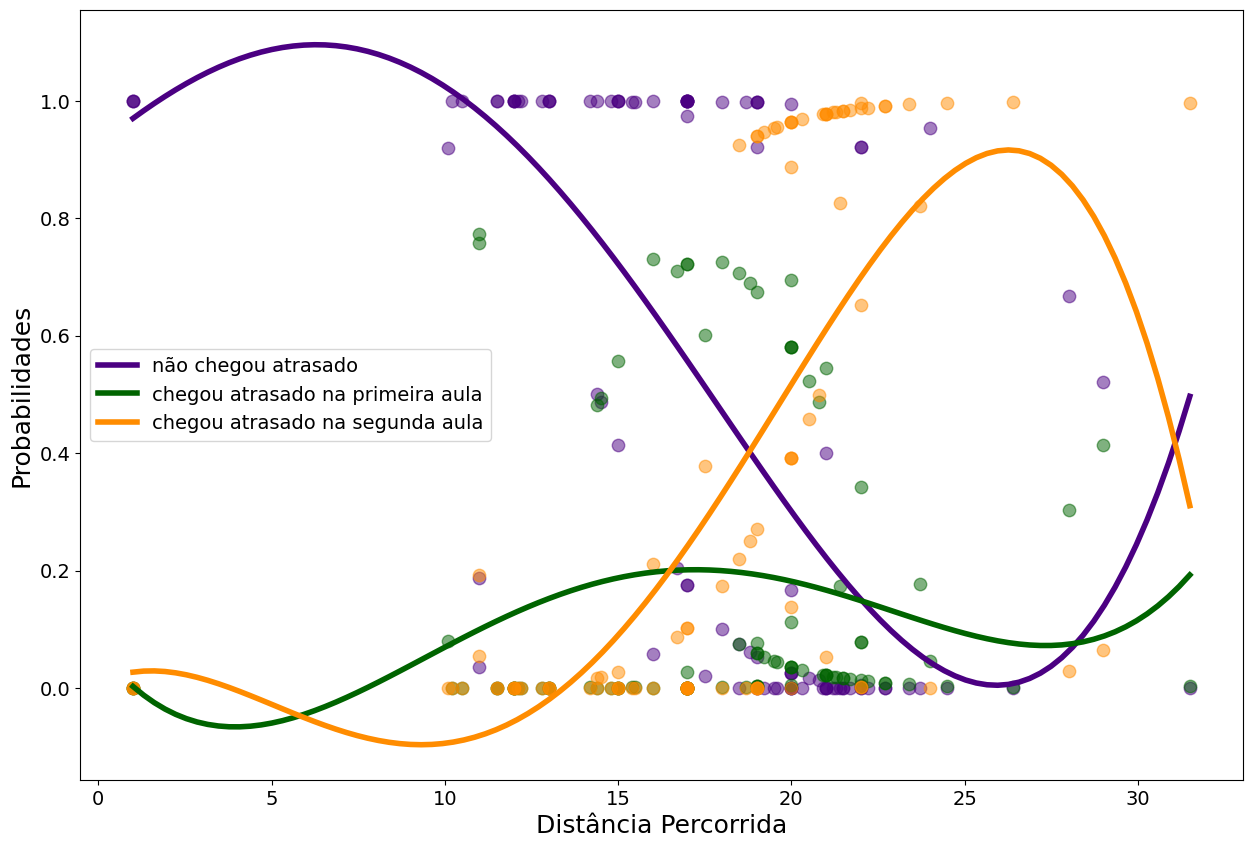

In [266]:
# In[4.10]: Plotagens das probabilidades

# Plotagem das smooth probability lines para a variável 'dist'

# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

plt.figure(figsize=(15,10))

# Plot para "não chegou atrasado"
sns.regplot(x='dist', y=df_atrasado_multinomial[0],
            data=df_atrasado_multinomial, ci=False, order=4,
            line_kws={'color':'indigo', 'linewidth':4,
                      'label':'não chegou atrasado'},
            scatter_kws={'color':'indigo', 's':80, 'alpha':0.5})

# Plot para "chegou atrasado na primeira aula"
sns.regplot(x='dist', y=df_atrasado_multinomial[1],
            data=df_atrasado_multinomial, ci=None, order=4,
            line_kws={'color':'darkgreen', 'linewidth':4,
                      'label':'chegou atrasado na primeira aula'},
            scatter_kws={'color':'darkgreen', 's':80, 'alpha':0.5})

# Plot para "chegou atrasado na segunda aula"
sns.regplot(x='dist', y=df_atrasado_multinomial[2],
            data=df_atrasado_multinomial, ci=None, order=4,
            line_kws={'color':'darkorange', 'linewidth':4,
                      'label':'chegou atrasado na segunda aula'},
            scatter_kws={'color':'darkorange', 's':80, 'alpha':0.5})

plt.xlabel('Distância Percorrida', fontsize=18)
plt.ylabel('Probabilidades', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='center left', fontsize=14)
plt.show()

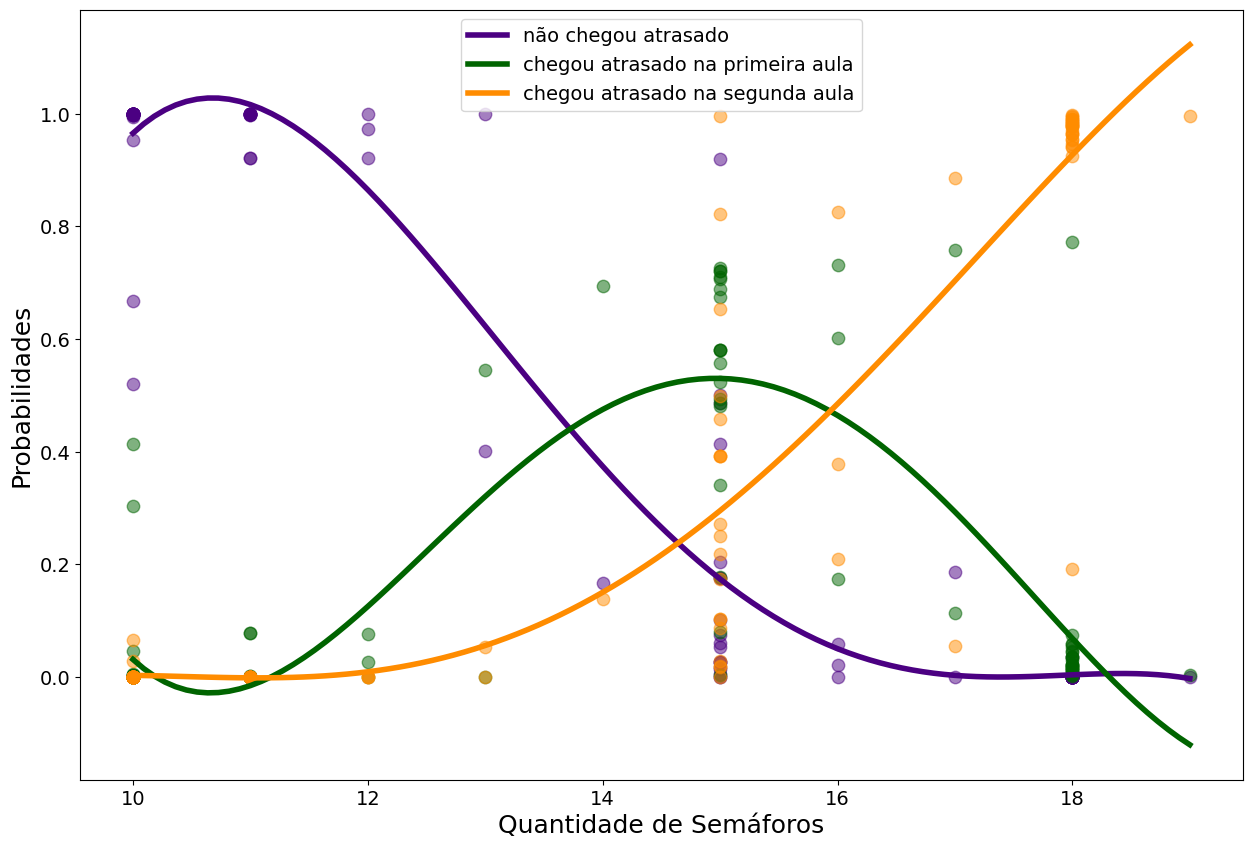

In [267]:
# In[4.11]: Plotagens das probabilidades

# Plotagem das smooth probability lines para a variável 'sem'

# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

plt.figure(figsize=(15,10))

# Plot para "não chegou atrasado"
sns.regplot(x='sem', y=df_atrasado_multinomial[0],
            data=df_atrasado_multinomial, ci=None, order=4,
            line_kws={'color':'indigo', 'linewidth':4,
                      'label':'não chegou atrasado'},
            scatter_kws={'color':'indigo', 's':80, 'alpha':0.5})

# Plot para "chegou atrasado na primeira aula"
sns.regplot(x='sem', y=df_atrasado_multinomial[1],
            data=df_atrasado_multinomial, ci=None, order=4,
            line_kws={'color':'darkgreen', 'linewidth':4,
                      'label':'chegou atrasado na primeira aula'},
            scatter_kws={'color':'darkgreen', 's':80, 'alpha':0.5})

# Plot para "chegou atrasado na segunda aula"
sns.regplot(x='sem', y=df_atrasado_multinomial[2],
            data=df_atrasado_multinomial, ci=None, order=4,
            line_kws={'color':'darkorange', 'linewidth':4,
                      'label':'chegou atrasado na segunda aula'},
            scatter_kws={'color':'darkorange', 's':80, 'alpha':0.5})

plt.xlabel('Quantidade de Semáforos', fontsize=18)
plt.ylabel('Probabilidades', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper center', fontsize=14)
plt.show()

In [270]:
# In[4.12]: Plotagem tridimensional para cada probabilidade de ocorrência de
#cada categoria da variável dependente

# Probabilidades de não se chegar atrasado (função 'go' do pacote 'plotly')

import plotly.io as pio
pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[0],
    opacity=1, intensity=df_atrasado_multinomial[0],
    colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='não chegou atrasado'))

plot_figure.show()

In [271]:
# In[4.13]: Plotagem tridimensional para cada probabilidade de ocorrência de
#cada categoria da variável dependente

# Probabilidades de se chegar atrasado à primeira aula (função 'go' do pacote
#'plotly')

pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[1],
    opacity=1, intensity=df_atrasado_multinomial[1],
    colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='chegou atrasado à primeira aula'))

plot_figure.show()

In [272]:
# In[4.14]: Plotagem tridimensional para cada probabilidade de ocorrência de
#cada categoria da variável dependente

# Probabilidades de se chegar atrasado à segunda aula (função 'go' do pacote
#'plotly')

pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[2],
    opacity=1, intensity=df_atrasado_multinomial[2],
    colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='chegou atrasado à segunda aula'))

plot_figure.show()

In [ ]:
# In[4.15]: Visualização das sigmoides tridimensionais em um único gráfico

pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[0],
    opacity=1,
    color='indigo')

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

trace_1 = go.Mesh3d(
            x=df_atrasado_multinomial['dist'], 
            y=df_atrasado_multinomial['sem'],
            z=df_atrasado_multinomial[1],
            opacity=1,
            color='darkgreen')

plot_figure.add_trace(trace_1)

trace_2 = go.Mesh3d(
            x=df_atrasado_multinomial['dist'], 
            y=df_atrasado_multinomial['sem'],
            z=df_atrasado_multinomial[2],
            opacity=1,
            color='darkorange')


plot_figure.add_trace(trace_2)

plot_figure.update_layout(
    template='plotly_dark',
    scene = dict(
        xaxis_title='dist',
        yaxis_title='sem',
        zaxis_title='probabilidades')
    )

plot_figure.show()

## Resumo e conclusão